# **Technical Assessment: Battery Energy Storage System (BESS) Analysis**

---

## **Objective**  
To evaluate the candidate’s ability to conduct advanced data analysis, develop sophisticated algorithms, and demonstrate a comprehensive understanding of Battery Energy Storage Systems (BESS) within the UK framework. Additionally, the candidate will prepare a detailed technical report assessing the feasibility of a two-week calibration rest period to qualify for a T-1 capacity market bid.  

---

## **Case Study**  
A 200 MWh Battery Energy Storage System (BESS) located in the UK is utilized for:  
- **Frequency Regulation**  
- **Energy Arbitrage**  
- **Peak Shaving**  

The assignment involves analyzing the system's performance, economic benefits, and operational strategies over a **six-month period**, with a specific focus on evaluating the feasibility of a **two-week calibration rest period**.  

---

## **Data Provided**  

### 1. **BESS Operation Data and Market Data (CSV File)**  
The dataset includes the following fields:  
- **Timestamp** (datetime)  
- **State of Charge (SOC)** (%)  
- **Power Output/Input** (MW)  
- **Frequency Regulation Signal** (Hz)  
- **Operational Mode** (Frequency Regulation, Energy Arbitrage, Peak Shaving)  
- **Market Price** (GBP/MWh)  

### 2. **BESS Specifications**  
- **Capacity**: 200 MWh  
- **Maximum Discharge Rate**: 50 MW  
- **Maximum Charge Rate**: 50 MW  
- **Round-Trip Efficiency**: 85%  

### 3. **Additional Information**  
- The **T-1 capacity market bid** is valued at **£1.5 million GBP**.  
- The **two-week calibration rest period** must immediately follow the **extended performance test**, which must occur between **October 1st and December 31st**.  

---

## **Tasks**  

### **1. Advanced Data Analysis**  
- **Data Preparation**:  
   - Load, clean, and merge the provided datasets using **Python** (pandas library).  
   - Ensure data consistency, handle missing values, and prepare the data for analysis.  

- **Performance Analysis**:  
   - Perform a detailed assessment of BESS **degradation** over time.  
   - Analyze its impact on the **round-trip efficiency**.  

- **Forecasting and Optimization**:  
   - Develop a **time series model** to forecast **market prices** and **demand**.  
   - Utilize the forecasted data to optimize the **BESS operation strategy** for revenue maximization.  

- **Rest Period Impact Analysis**:  
   - Evaluate the impact of a **two-week complete rest period** on BESS performance.  
   - Assess the effect on the overall economic benefits, including revenue loss and system efficiency.  

- **Scheduling Options**:  
   - Highlight **three options** for scheduling the two-week rest period to minimize revenue losses and optimize system performance.  

---

### **Key Deliverables**  
1. Comprehensive technical report detailing all analyses, findings, and recommendations.  
2. Visualizations and statistical insights supporting the proposed strategies.  
3. A summary highlighting the optimal schedule for the two-week calibration rest period.  

---

This structured approach will ensure an in-depth assessment of the BESS system’s performance, financial implications, and feasibility for the T-1 capacity market bid.

In [119]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn
#!pip install sklearn

In [120]:
# importing  data analysis libraries
import numpy as np           # For numerical operations
import pandas as pd          # For data manipulation and analysis
import matplotlib.pyplot as plt  # For basic data visualization
import seaborn as sns        # For advanced data visualization
import scipy.stats as stats  # For statistical functions
import sklearn               # For machine learning and data preprocessing
import statsmodels.api as sm # For statistical modeling
import datetime              # For working with dates and times

In [121]:
# Load the dataset
energy_data_url = "/content/drive/MyDrive/Energy Analyst_merged_bess_market_data.csv"
data = pd.read_csv(energy_data_url)
# data = pd.read_csv(energy_data_url, parse_dates=['Timestamp'])

data.head()


,Timestamp,SOC,Power Output/Input,Frequency Regulation Signal,Operational Mode,Market Price
0,2024-01-01 00:00:00,51.952540,-28.738790,50.083497,Frequency Regulation,69.305419
1,2024-01-01 00:15:00,58.607575,24.935404,50.175157,Frequency Regulation,97.456370
2,2024-01-01 00:30:00,54.110535,-13.202597,50.044089,Energy Arbitrage,60.762161
3,2024-01-01 00:45:00,51.795327,-19.118928,49.957396,Frequency Regulation,32.653461
4,2024-01-01 01:00:00,46.946192,9.251126,50.146476,Energy Arbitrage,49.730162


# **Data Cleaning**

In this part of the analysis:

* Timestamp Parsing: Ensure proper datetime format for the Timestamp column.
* Missing Values: Identify and handle missing data.
* Outliers: Detect and handle any anomalies in columns like SOC, Power Output/Input, and Market Price.
* Categorical Variables: Verify and clean Operational Mode categories.


In [122]:
# Convert 'Timestamp' to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [123]:
# Check for missing values
print(data.isnull().sum())


Timestamp                      0
SOC                            0
Power Output/Input             0
Frequency Regulation Signal    0
Operational Mode               0
Market Price                   0
dtype: int64


There are no missing values in the Datasets

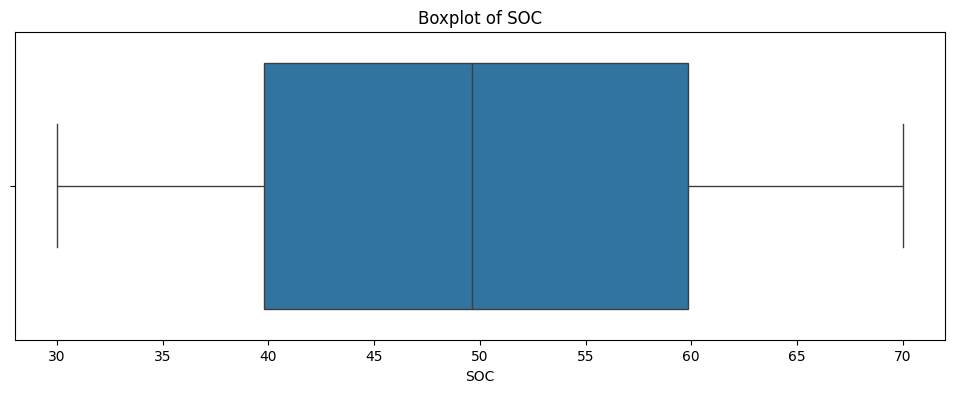

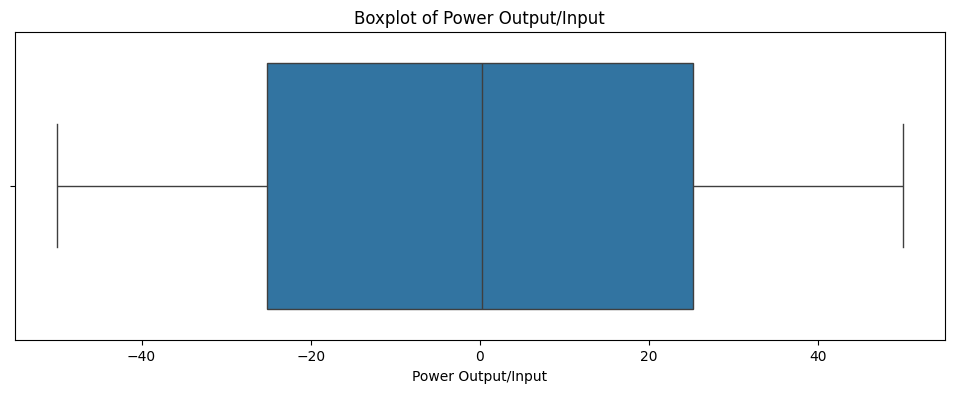

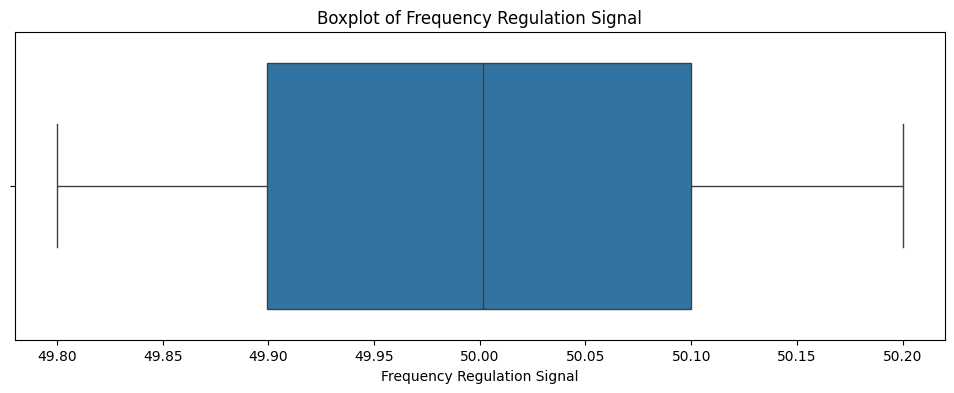

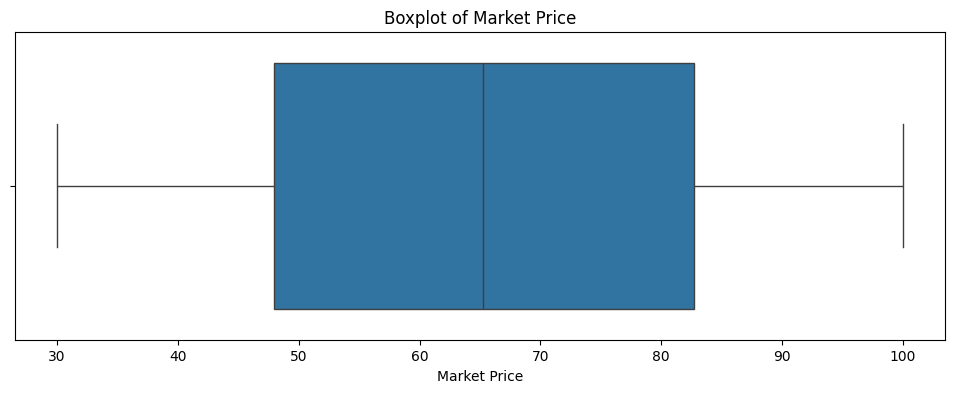

In [124]:
# Checking for outliers in numerical columns
numerical_cols = ['SOC', 'Power Output/Input', 'Frequency Regulation Signal', 'Market Price']
for col in numerical_cols:
    plt.figure(figsize=(12, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()



The Datasets does not contain any outliers, now we will proceed to the next step

In [125]:
# Check 'Operational Mode' categories
print(data['Operational Mode'].unique())


['Frequency Regulation' 'Energy Arbitrage' 'Peak Shaving']


There are 3 distinct Operational mode namely:
* Frequency Regulation
* Energy Arbitrage
* Peak Shaving



In [126]:
# check for duplicate
no_of_duplicated =data.duplicated().sum()
if no_of_duplicated > 0:
  print(f"There are {no_of_duplicated} duplicate rows in the datasets")
else:
  print("There are no duplicat rows in the datasets")

There are no duplicat rows in the datasets


The datasets does not contain duplicated rows

In [127]:
# check and address data types
data.dtypes

,0
Timestamp,datetime64[ns]
SOC,float64
Power Output/Input,float64
Frequency Regulation Signal,float64
Operational Mode,object
Market Price,float64


## **Feature Engineering**

For the sake of Granulartity, some new columns needs to be added/ extracted from the Timestamp column

In [128]:
# Extract time-based features
data['Hour of Day'] = data['Timestamp'].dt.hour
data['Day of Week'] = (data['Timestamp'].dt.dayofweek + 1) # Monday=1, Sunday=7
data['Day of Month'] = data['Timestamp'].dt.day

# Verify the new column
data.head()


,Timestamp,SOC,Power Output/Input,Frequency Regulation Signal,Operational Mode,Market Price,Hour of Day,Day of Week,Day of Month
0,2024-01-01 00:00:00,51.952540,-28.738790,50.083497,Frequency Regulation,69.305419,0,1,1
1,2024-01-01 00:15:00,58.607575,24.935404,50.175157,Frequency Regulation,97.456370,0,1,1
2,2024-01-01 00:30:00,54.110535,-13.202597,50.044089,Energy Arbitrage,60.762161,0,1,1
3,2024-01-01 00:45:00,51.795327,-19.118928,49.957396,Frequency Regulation,32.653461,0,1,1
4,2024-01-01 01:00:00,46.946192,9.251126,50.146476,Energy Arbitrage,49.730162,1,1,1


Make copy of the data to be used to  build predictive model

In [129]:
df = data.copy()

# **Exploratory Data Analysis (EDA)**
performing exploratory data analysis as follows:

* Summary statistics
* Visualizing Key Pattern


## **Summary Statistics**


In [130]:
# Summary statistics
data.describe()


,Timestamp,SOC,Power Output/Input,Frequency Regulation Signal,Market Price,Hour of Day,Day of Week,Day of Month
count,17377,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000
mean,2024-03-31 12:00:00,49.779601,0.006446,50.000154,65.266505,11.499338,3.983599,15.597514
min,2024-01-01 00:00:00,30.002898,-49.976941,49.800080,30.000232,0.000000,1.000000,1.000000
25%,2024-02-15 06:00:00,39.777024,-25.194416,49.899474,47.913564,5.000000,2.000000,8.000000
50%,2024-03-31 12:00:00,49.627001,0.293242,50.001598,65.294996,11.000000,4.000000,16.000000
75%,2024-05-15 18:00:00,59.861882,25.173220,50.099785,82.737011,17.000000,6.000000,23.000000
max,2024-06-30 00:00:00,69.999118,49.991874,50.199987,99.987373,23.000000,7.000000,31.000000
std,NaN,11.587374,28.945367,0.115368,20.183619,6.922736,1.993144,8.727210


In [131]:
# Count unique modes of operation
data['Operational Mode'].value_counts()


,count
Operational Mode,
Peak Shaving,5826
Frequency Regulation,5810
Energy Arbitrage,5741


## **Visualizing Key Patterns**

This Section will be done as follows:
* SOC trend over time
* Power Input/output Distribution
* Market Price Trend
* Operational Mode Behaviour
* Correlation Analysis

### **Soc Trend Over Time**

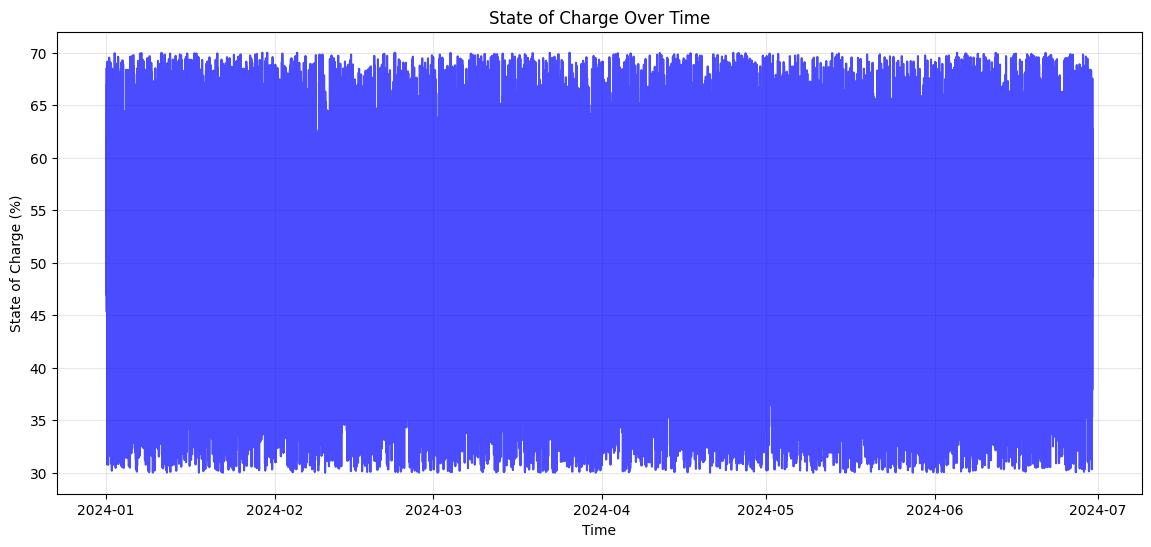

In [132]:
# SOC Over time
plt.figure(figsize=(14, 6))
plt.plot(data['Timestamp'], data['SOC'], color='blue', alpha=0.7)
plt.title('State of Charge Over Time')
plt.xlabel('Time')
plt.ylabel('State of Charge (%)')
plt.grid(alpha=0.3)
plt.show()


<ipython-input-133-a16236f7935c>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='Hour of Day', y='SOC', ci=None)


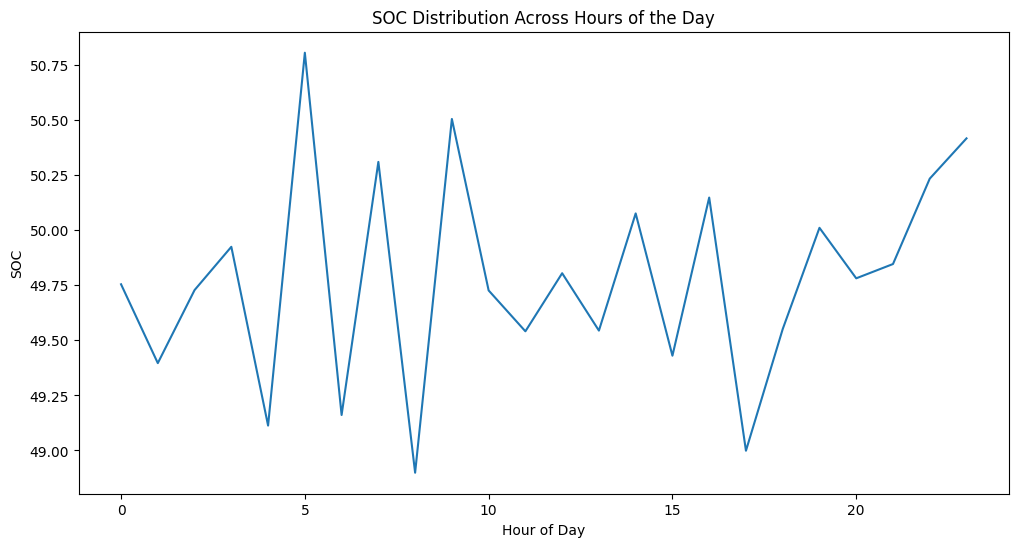

In [133]:
# inspect hour of the day with the mont SOC
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Hour of Day', y='SOC', ci=None)
plt.title("SOC Distribution Across Hours of the Day")
plt.show()


From the above observation, we can say that the peak hours where SOC is highest is at the 5th hour of the day, say 5:00 am and the time where SOCis lowest is the 8th hour of the day say 8:00 am.

<ipython-input-134-6860b647bbdb>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='Day of Week', y='SOC', ci=None)


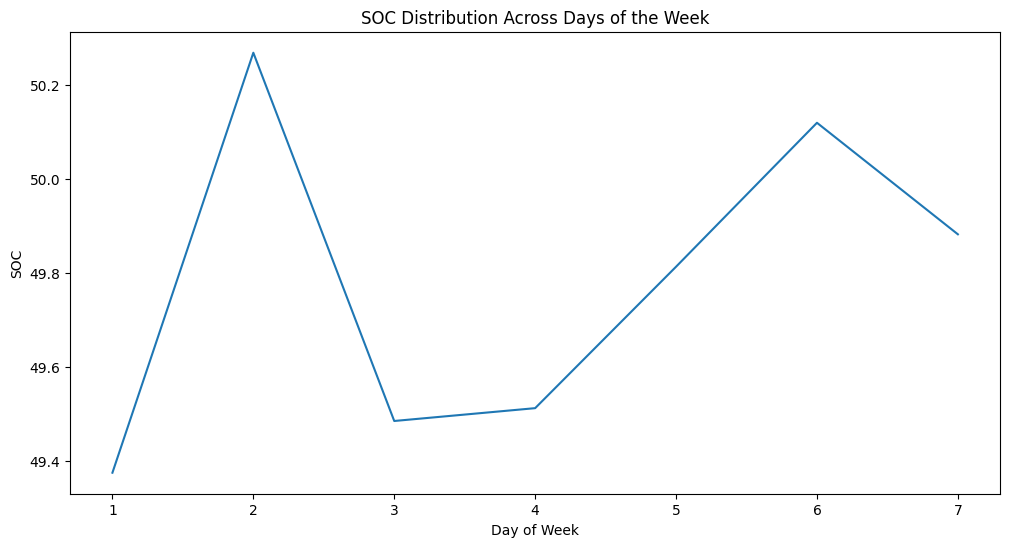

In [134]:
# check the day of the week with the highest SOC
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Day of Week', y='SOC', ci=None)
plt.title("SOC Distribution Across Days of the Week")
plt.show()


from observation of the above chart, we can say that SOC is highest on the second day of the week which is tuesday and lowest on the first day which is monday

<ipython-input-135-dd72339564de>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='Day of Month', y='SOC', ci=None)


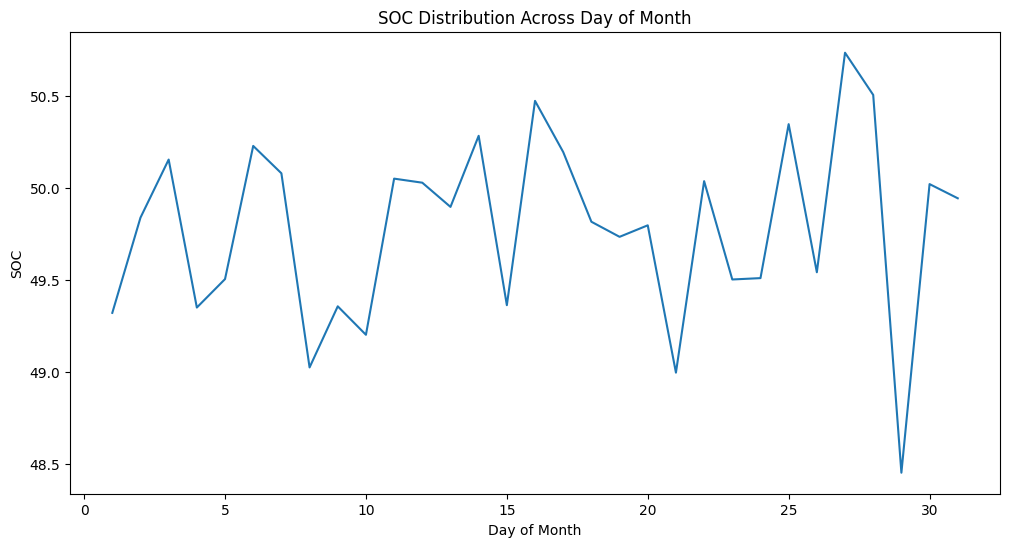

In [135]:
# check the day of the month where soc is highest
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Day of Month', y='SOC', ci=None)
plt.title("SOC Distribution Across Day of Month")
plt.show()


State of Charge (SOC), is highest on the 27th day of the month and lowest on the 29th day

## **Power Input/Output Distribution**

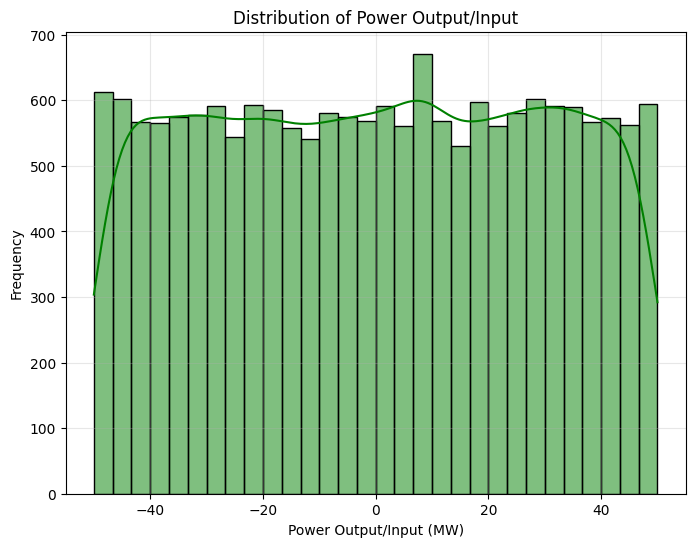

In [136]:
# Power input/output Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Power Output/Input'], kde=True, color='green', bins=30)
plt.title('Distribution of Power Output/Input')
plt.xlabel('Power Output/Input (MW)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()


* The distribution is roughly uniform, with values spanning from approximately -50 MW to +50 MW.
* There is a slight peak near zero, which indicates the system often operates near neutral (input and output nearly balanced).


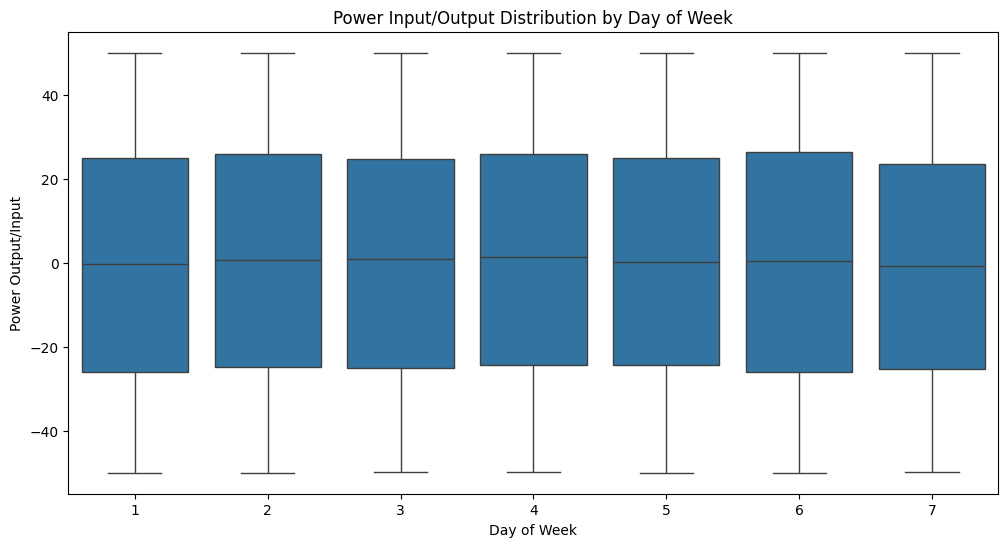

In [137]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Day of Week', y='Power Output/Input')
plt.title("Power Input/Output Distribution by Day of Week")
plt.show()

### **Key Insights:**
- **Stable Performance:** Power input/output is consistent across all days with no significant variation.
- **Balanced System:** Median near 0 suggests inputs (charging) and outputs (discharging) are balanced.
- **Predictable Range:** Similar IQR and whiskers indicate reliable and manageable power dynamics.
- **Real-World Implication:** Indicates system stability, reliability, and predictable energy operations—ideal for BESS or grid management.

<ipython-input-138-1b48ecabca2e>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='Hour of Day', y='Power Output/Input', ci=None)


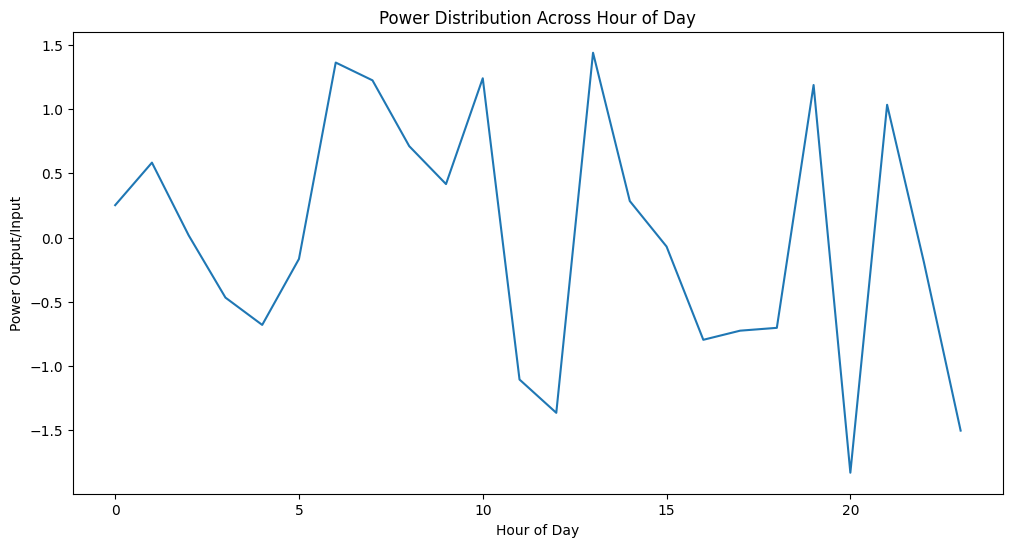

In [138]:
# observing hourly power distribution
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Hour of Day', y='Power Output/Input', ci=None)
plt.title("Power Distribution Across Hour of Day")
plt.show()

The graph illustrates the variation in power output/input across different hours of the day, showing significant fluctuations. Peaks likely represent times of high power generation or efficiency, while dips indicate lower efficiency or potential power loss.

### Real-life implications:
1. **Energy Management**: Fluctuations suggest the need for energy storage systems to balance surplus and deficits.
2. **Cost Optimization**: Peak hours can guide operational adjustments for cost savings.
3. **Grid Stability**: Highlights the importance of matching supply with demand to prevent outages.
4. **Renewable Energy**: Could reflect solar or wind generation variability, indicating reliance on intermittent resources.


<ipython-input-139-0b33bbb0b448>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='Day of Month', y='Power Output/Input', ci=None)


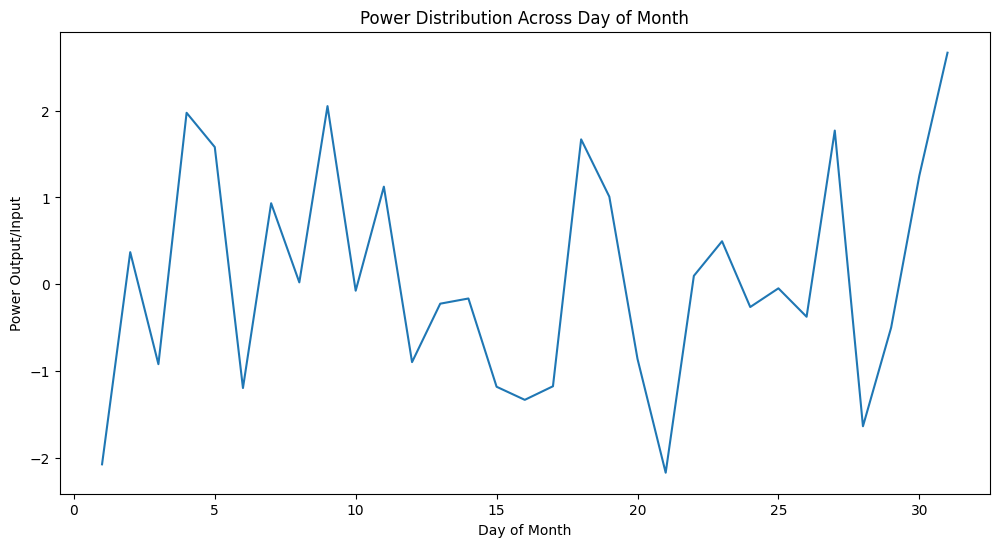

In [139]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Day of Month', y='Power Output/Input', ci=None)
plt.title("Power Distribution Across Day of Month")
plt.show()

### **Key Insights:**
- **Fluctuating Trends:** Power input/output varies significantly across the month with peaks and troughs.
- **Positive and Negative Values:** Power balance alternates between input (negative) and output (positive).
- **Days with Extremes:** Sharp spikes occur at specific days (e.g., start, mid, and end of the month).
- **Real-World Implication:** Indicates irregular power usage or storage patterns, requiring monitoring to identify causes of volatility for better system optimization.

## **Market Price**

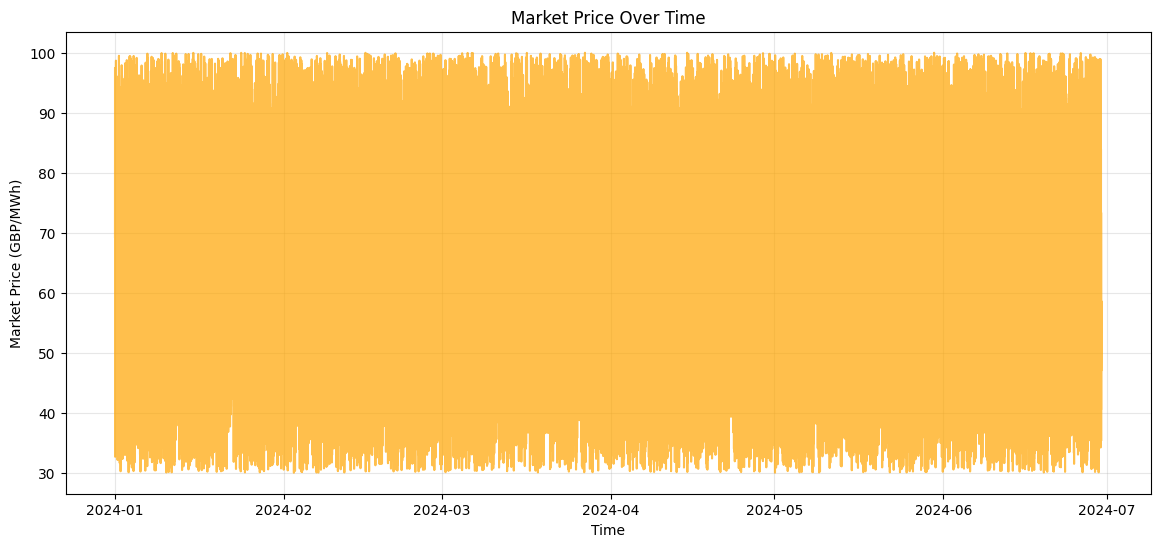

In [140]:
# market Price Trend
plt.figure(figsize=(14, 6))
plt.plot(data['Timestamp'], data['Market Price'], color='orange', alpha=0.7)
plt.title('Market Price Over Time')
plt.xlabel('Time')
plt.ylabel('Market Price (GBP/MWh)')
plt.grid(alpha=0.3)
plt.show()


<ipython-input-141-93b7af6660ca>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='Hour of Day', y='Market Price', ci=None)


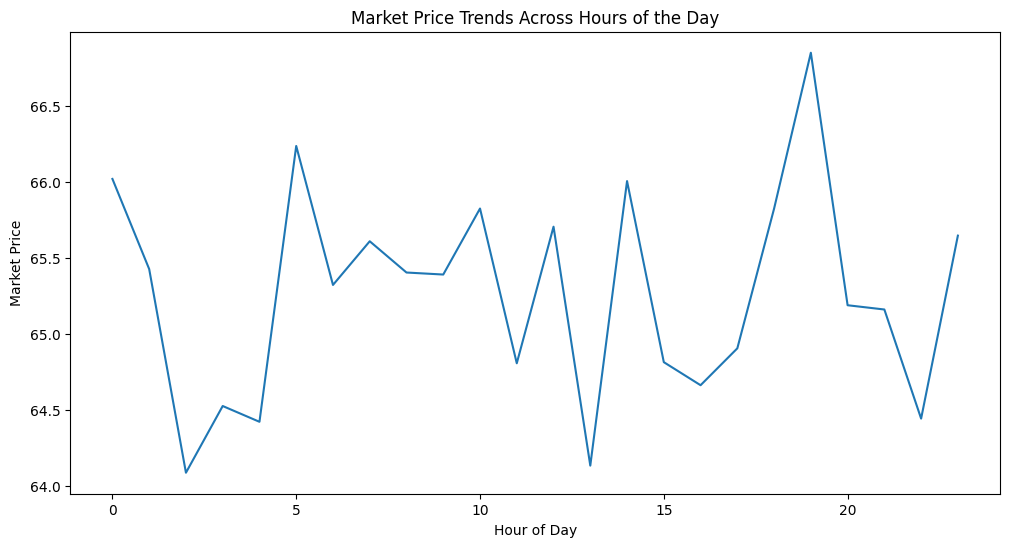

In [141]:
# investigating Hourly market price behaviour
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Hour of Day', y='Market Price', ci=None)
plt.title("Market Price Trends Across Hours of the Day")
plt.show()


The graph shows market price trends across different hours of the day, with fluctuations between approximately 64.0 and 66.5. Peaks indicate high demand or lower supply, while troughs represent lower demand or surplus supply.

### Real-life implications:
1. **Trading Strategy**: Helps traders identify optimal times for buying (low prices) and selling (high prices).
2. **Demand-Supply Dynamics**: Reflects the impact of consumer behavior and market conditions throughout the day.
3. **Energy Pricing**: If tied to energy markets, highlights the importance of aligning generation with high-price periods for profitability.
4. **Cost Prediction**: Businesses can plan operations to minimize costs during high-price hours.

<ipython-input-142-e1d17357c793>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='Day of Week', y='Market Price', ci=None)


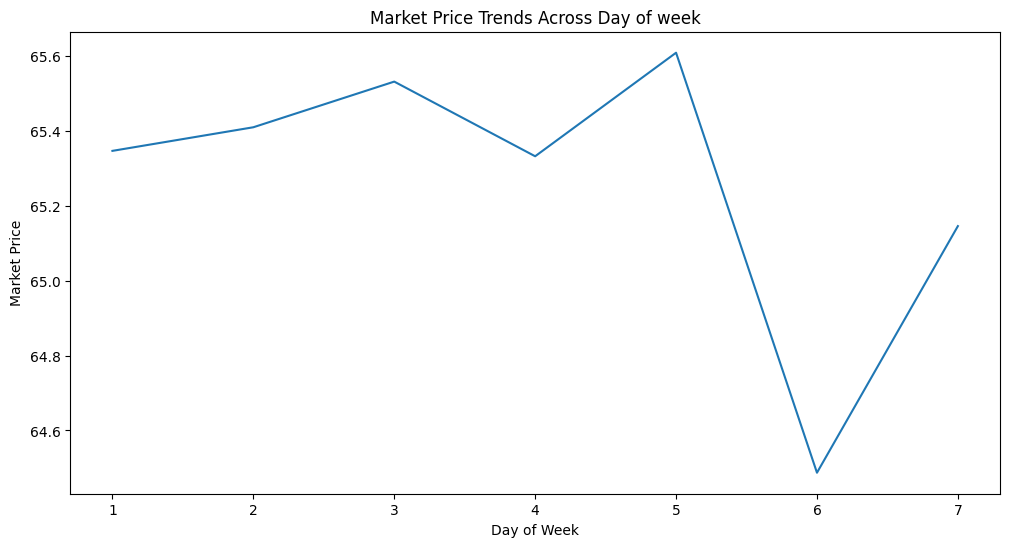

In [142]:
# investigating market price behaviour for day of the week
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Day of Week', y='Market Price', ci=None)
plt.title("Market Price Trends Across Day of week")
plt.show()


The graph shows market price trends across the days of the week, with a steady rise early in the week, a peak midweek (Day 4), and a sharp drop on Day 6 followed by recovery on Day 7.

### Real-life implications:
1. **Weekly Patterns**: Reflects predictable demand/supply trends, useful for planning resource allocation.
2. **Strategic Decisions**: Businesses can focus operations or sales on peak-price days to maximize revenue.
3. **Cost Management**: Helps optimize procurement or operational costs on low-price days.
4. **Market Cycles**: Indicates potential weekend effects (e.g., reduced activity on Day 6).

<ipython-input-143-b1c85549b2e0>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='Day of Month', y='Market Price', ci=None)


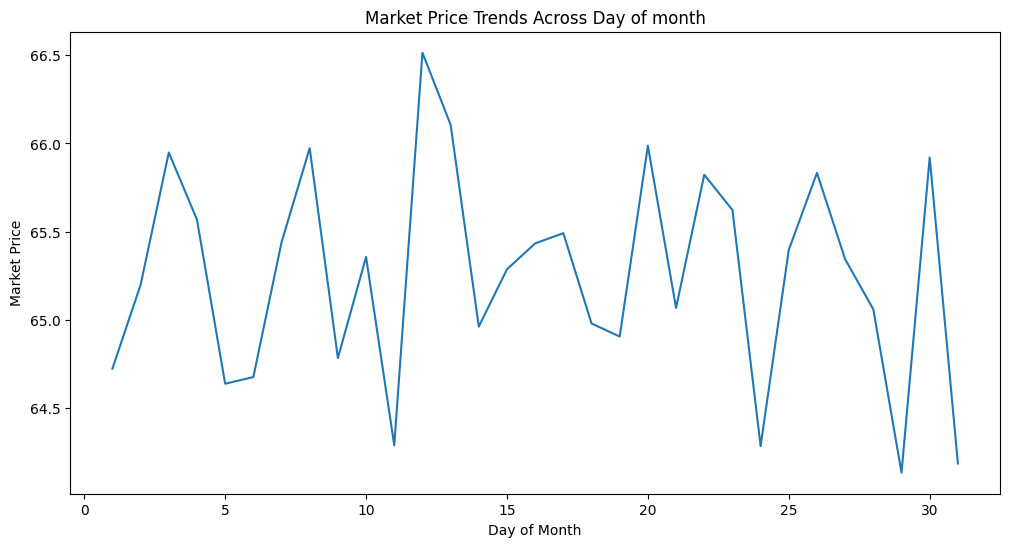

In [143]:
# investigating market price behaviour for day of the month
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Day of Month', y='Market Price', ci=None)
plt.title("Market Price Trends Across Day of month")
plt.show()


The graph illustrates market price trends across days of the month, showing significant fluctuations with multiple peaks and troughs, suggesting periodic variability.

### Real-life implications:
1. **Monthly Patterns**: Indicates recurring cycles of high and low prices, possibly linked to billing cycles, seasonal demand, or supply chain factors.
2. **Strategic Timing**: Businesses can leverage price dips for procurement or adjust pricing strategies during peak periods.
3. **Budget Planning**: Organizations can predict and allocate costs effectively, avoiding peak-price days.
4. **Market Volatility**: Highlights the need to manage risks associated with inconsistent price trends.

## **Operational Mode Behaviour**

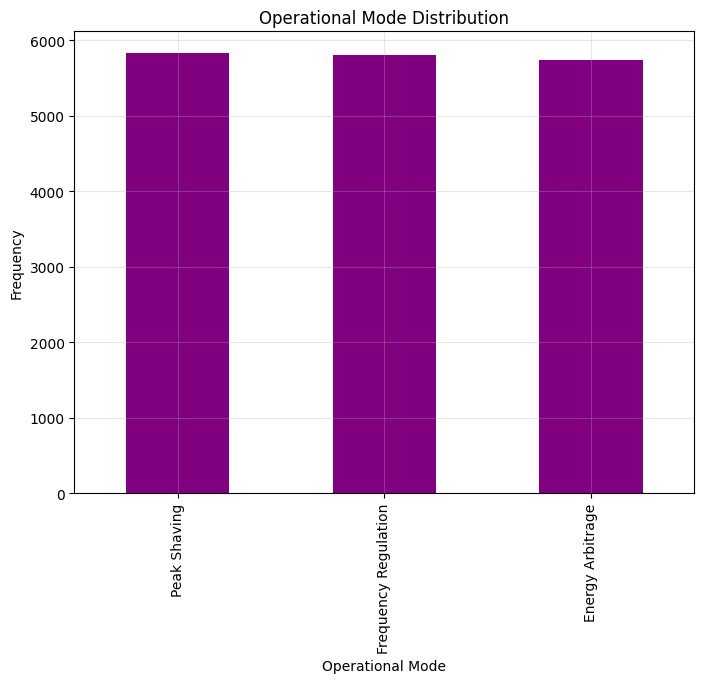

In [144]:
# operational mode Behaviour
plt.figure(figsize=(8, 6))
data['Operational Mode'].value_counts().plot(kind='bar', color='purple')
plt.title('Operational Mode Distribution')
plt.xlabel('Operational Mode')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()


The distribution across Operational Mode is almost uniform, with each mode (Peak Shaving, Frequency Regulation, and Energy Arbitrage) having similar frequencies.


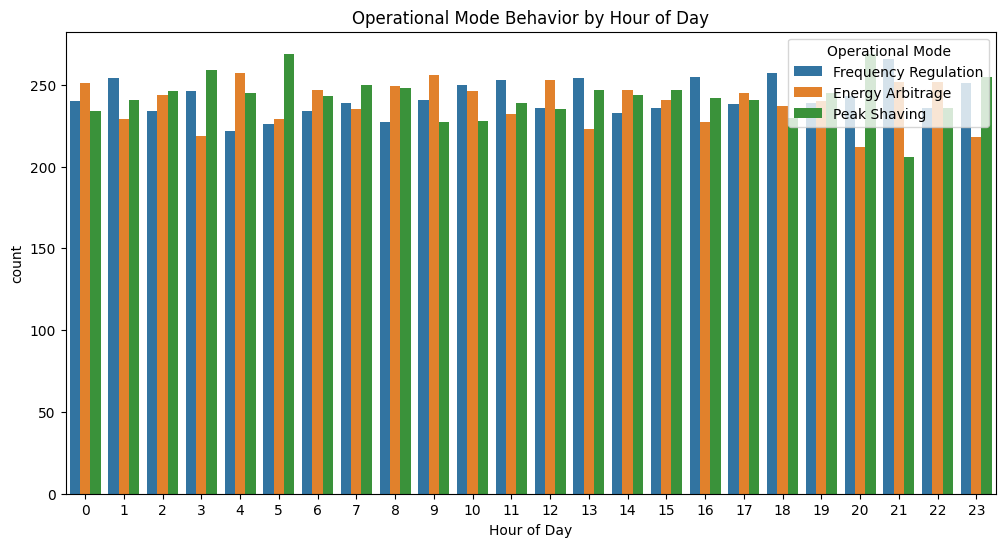

In [145]:
# Operational mode behaviour accross the hour of the Day
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Hour of Day', hue='Operational Mode')
plt.title("Operational Mode Behavior by Hour of Day")
plt.show()


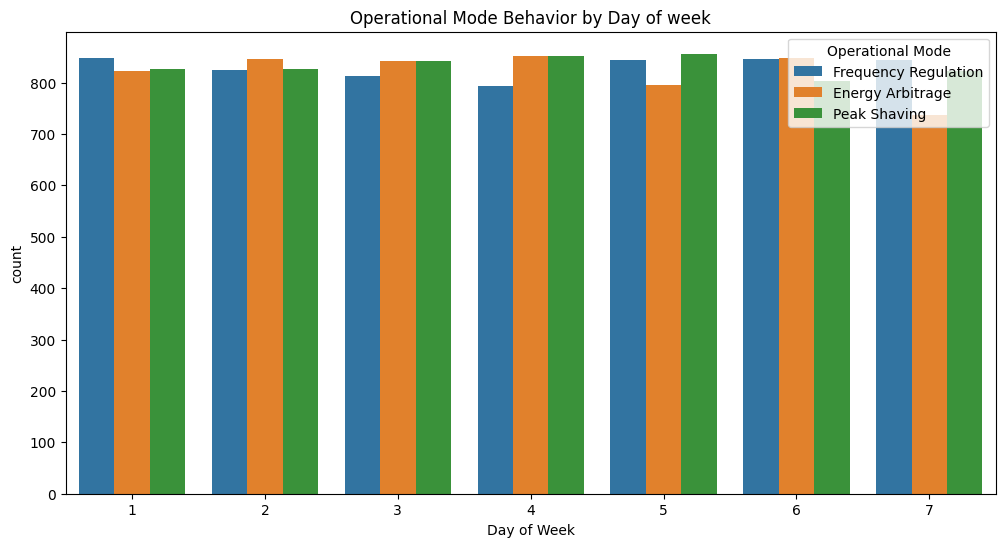

In [146]:
# Operational mode behaviour accross the Day of week
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Day of Week', hue='Operational Mode')
plt.title("Operational Mode Behavior by Day of week")
plt.show()


## **coorelation Analysis**


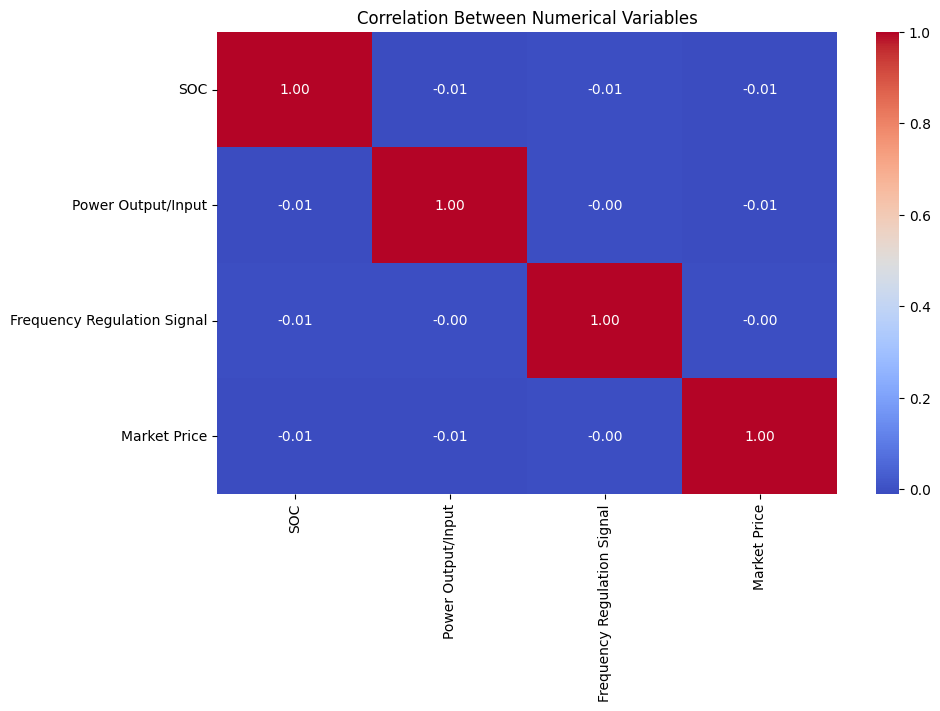

In [147]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Numerical Variables')
plt.show()


* All variables appear to have near-zero correlation with each other. This suggests there is minimal linear relationship between SOC, Power Output/Input, Frequency Regulation Signal, and Market Price.
* The dataset is relatively independent, with no strong multicollinearity observed.


### **overall Insight Summary From EDA**
* The dataset suggests a structured and balanced operational system.
* Variables are largely independent, which could simplify certain analyses but may limit insights derived from relationships.
* Operational modes and power patterns seem evenly distributed, indicating no immediate skew or bias in the data.

We can Now proceed to the next stage of our analysis


# **Data Analysis Of BESS Datasets**
This analysis will take the following steps:

* **Degradation Analysis:** Assess trends in SOC, Power Output/Input, and Round-Trip Efficiency over time.
* **Operational Insights:** Analyze how different operational modes affect performance and revenue.
* **Economic Impact Assessment:** Calculate revenue and identify trends related to Market Price and operational decisions.


## **BESS Degradation Analysis**

**SOC Trends Over Time:**

* Calculate daily and monthly averages of SOC to detect long-term variations.
* Identify any patterns or anomalies in the SOC levels.


In [148]:
# Set the Timestamp column as the index for easier time-based analysis
data.set_index('Timestamp', inplace=True)

In [149]:
# Resample to daily averages for SOC
daily_soc = data['SOC'].resample('D').mean()

In [150]:
# Resample to monthly averages for SOC
monthly_soc = data['SOC'].resample('M').mean()

<ipython-input-150-cb6cdfb119d9>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_soc = data['SOC'].resample('M').mean()


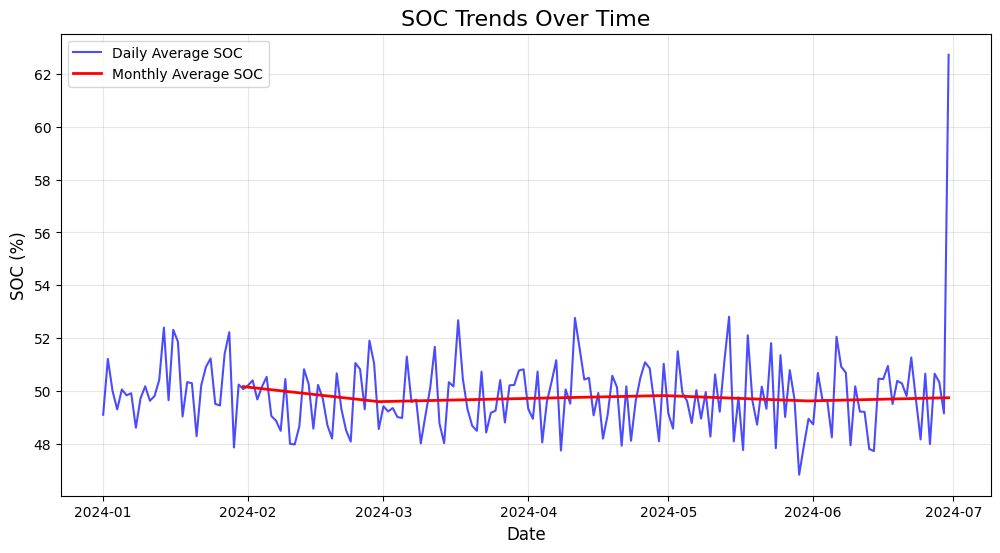

In [151]:
# Plot the daily SOC trend
plt.figure(figsize=(12, 6))
plt.plot(daily_soc, label='Daily Average SOC', color='blue', alpha=0.7)
plt.plot(monthly_soc, label='Monthly Average SOC', color='red', linewidth=2)
plt.title('SOC Trends Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('SOC (%)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


**Insights:**
* Daily Variability: The SOC fluctuates significantly on a day-to-day basis, suggesting operational or environmental factors impacting daily performance.
* Stable Monthly Average: The monthly average SOC remains relatively stable across the timeline, centered around 50%, with no major upward or downward trend.
* Anomaly in June 2024: A noticeable spike in the daily average SOC occurs in June 2024, indicating a potential data anomaly, operational change, or one-off event requiring further investigation.

### **Efficiency Over Time:**

* Derive Round-Trip Efficiency using Power Output/Input and evaluate its trends over time.
* Compare efficiencies during different operational modes (Frequency Regulation, Energy Arbitrage, Peak Shaving).

In [152]:
# Daily and Monthly RTE Calculations
data['Energy Flow'] = data['Power Output/Input'] * 0.25  # Convert MW to MWh
data['Charged Energy'] = data['Energy Flow'].where(data['Energy Flow'] < 0, 0).abs()  # Charging (negative)
data['Discharged Energy'] = data['Energy Flow'].where(data['Energy Flow'] > 0, 0)     # Discharging (positive)
data.head()

,SOC,Power Output/Input,Frequency Regulation Signal,Operational Mode,Market Price,Hour of Day,Day of Week,Day of Month,Energy Flow,Charged Energy,Discharged Energy
Timestamp,,,,,,,,,,,
2024-01-01 00:00:00,51.952540,-28.738790,50.083497,Frequency Regulation,69.305419,0,1,1,-7.184697,7.184697,0.000000
2024-01-01 00:15:00,58.607575,24.935404,50.175157,Frequency Regulation,97.456370,0,1,1,6.233851,0.000000,6.233851
2024-01-01 00:30:00,54.110535,-13.202597,50.044089,Energy Arbitrage,60.762161,0,1,1,-3.300649,3.300649,0.000000
2024-01-01 00:45:00,51.795327,-19.118928,49.957396,Frequency Regulation,32.653461,0,1,1,-4.779732,4.779732,0.000000
2024-01-01 01:00:00,46.946192,9.251126,50.146476,Energy Arbitrage,49.730162,1,1,1,2.312781,0.000000,2.312781


In [153]:
# Aggregate monthly levels
monthly_energy = data.resample('M').sum()
monthly_energy['Round-Trip Efficiency'] = (monthly_energy['Discharged Energy'] /
                                           monthly_energy['Charged Energy']) * 100


<ipython-input-153-a47d8ebea718>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_energy = data.resample('M').sum()


In [154]:
# Aggregate to daily level
daily_energy = data.groupby(['Day of Month', 'Day of Week']).sum()
daily_energy['Round-Trip Efficiency'] = (daily_energy['Discharged Energy'] / daily_energy['Charged Energy']) * 100

# Aggregate to hourly level
hourly_energy = data.groupby(['Day of Month', 'Hour of Day']).sum()
hourly_energy['Round-Trip Efficiency'] = (hourly_energy['Discharged Energy'] / hourly_energy['Charged Energy']) * 100

# Reset index to make the result cleaner
daily_energy = daily_energy.reset_index()
hourly_energy = hourly_energy.reset_index()


In [155]:
# Identify days with RTE < 80%
low_efficiency_days = daily_energy[daily_energy['Round-Trip Efficiency'] < 80]
low_efficiency_days.head()

,Day of Month,Day of Week,SOC,Power Output/Input,Frequency Regulation Signal,Operational Mode,Market Price,Hour of Day,Energy Flow,Charged Energy,Discharged Energy,Round-Trip Efficiency
4,1,6,4678.728232,-460.307452,4800.177465,Frequency RegulationFrequency RegulationEnergy...,6257.529918,1104,-115.076863,344.819894,229.743031,66.626965
8,2,6,4725.594146,-437.211982,4800.954881,Frequency RegulationPeak ShavingEnergy Arbitra...,6167.718393,1104,-109.302995,350.569114,241.266119,68.821271
27,6,3,4925.046992,-621.963964,4800.048607,Peak ShavingFrequency RegulationFrequency Regu...,6350.732541,1104,-155.490991,380.403941,224.912950,59.124769
32,7,4,4759.742821,-373.399990,4799.052422,Energy ArbitragePeak ShavingFrequency Regulati...,6092.640232,1104,-93.349997,393.334188,299.984190,76.267001
55,12,1,4671.817273,-278.758364,4799.670557,Energy ArbitragePeak ShavingEnergy ArbitrageEn...,6299.175008,1104,-69.689591,343.017802,273.328211,79.683389


In [156]:
# identify Hours with Low efficiency
low_efficiency_hours = hourly_energy[hourly_energy['Round-Trip Efficiency'] < 80]
low_efficiency_hours.head()


,Day of Month,Hour of Day,SOC,Power Output/Input,Frequency Regulation Signal,Operational Mode,Market Price,Day of Week,Energy Flow,Charged Energy,Discharged Energy,Round-Trip Efficiency
2,1,2,1212.524616,-145.972502,1199.948868,Peak ShavingEnergy ArbitrageFrequency Regulati...,1606.195467,80,-36.493125,101.573037,65.079911,64.072035
4,1,4,1229.091161,-142.559539,1200.672569,Frequency RegulationEnergy ArbitragePeak Shavi...,1695.382539,80,-35.639885,92.771494,57.131609,61.583151
5,1,5,1307.990213,-98.815555,1199.952407,Energy ArbitrageFrequency RegulationFrequency ...,1703.432234,80,-24.703889,98.973708,74.269820,75.039948
7,1,7,1182.829405,-315.832377,1200.393449,Peak ShavingEnergy ArbitrageFrequency Regulati...,1527.940502,80,-78.958094,121.696946,42.738852,35.119083
8,1,8,1108.192757,-203.581533,1199.942678,Energy ArbitrageFrequency RegulationPeak Shavi...,1572.363603,80,-50.895383,99.482155,48.586771,48.839685


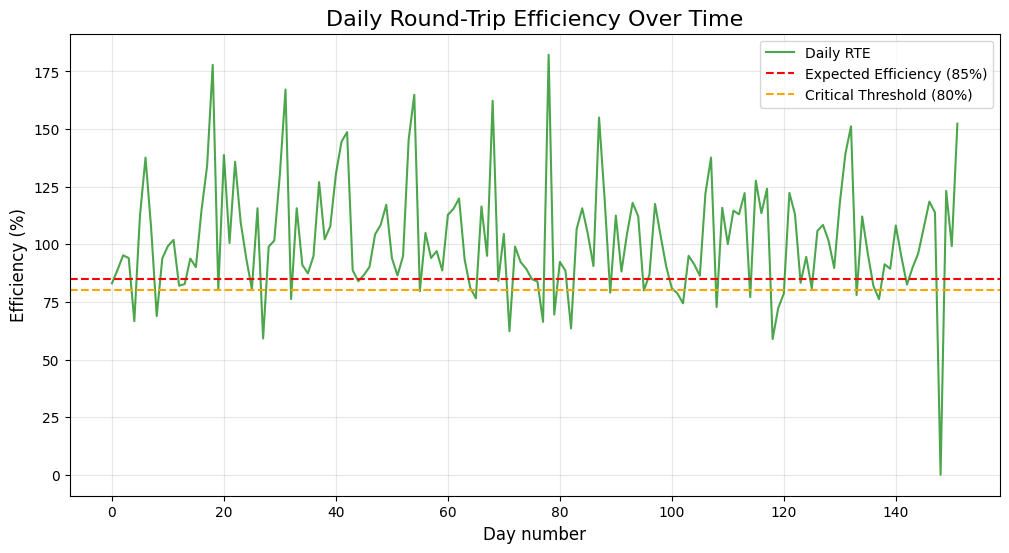

In [157]:
# Plotting Daily RTE Trends
plt.figure(figsize=(12, 6))
plt.plot(daily_energy['Round-Trip Efficiency'], label='Daily RTE', color='green', alpha=0.7)
plt.axhline(y=85, color='red', linestyle='--', label='Expected Efficiency (85%)')  # Benchmark
plt.axhline(y=80, color='orange', linestyle='--', label='Critical Threshold (80%)')
plt.title('Daily Round-Trip Efficiency Over Time', fontsize=16)
plt.xlabel('Day number', fontsize=12)
plt.ylabel('Efficiency (%)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


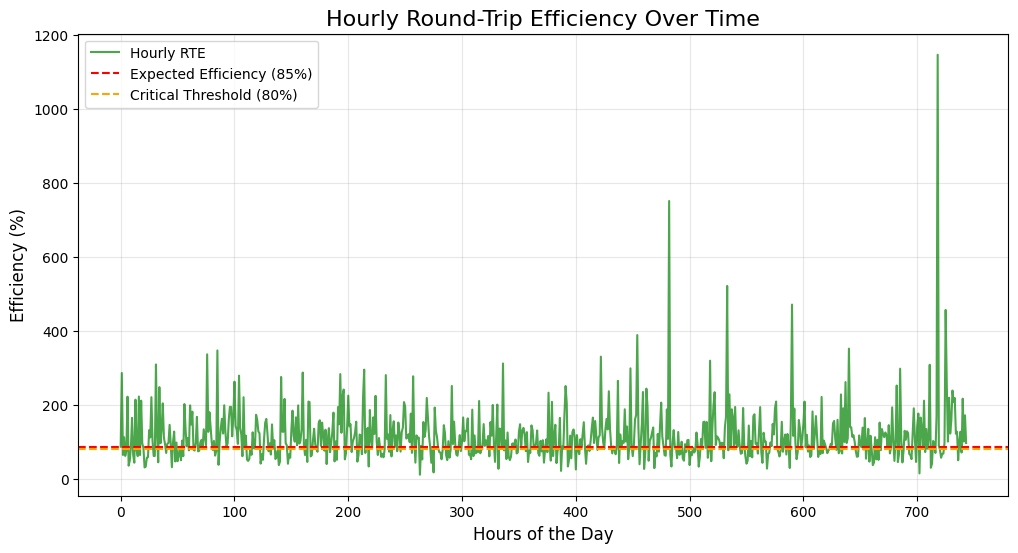

In [158]:
# Plotting Hourly RTE Trends
plt.figure(figsize=(12, 6))
plt.plot(hourly_energy['Round-Trip Efficiency'], label='Hourly RTE', color='green', alpha=0.7)
plt.axhline(y=85, color='red', linestyle='--', label='Expected Efficiency (85%)')  # Benchmark
plt.axhline(y=80, color='orange', linestyle='--', label='Critical Threshold (80%)')
plt.title('Hourly Round-Trip Efficiency Over Time', fontsize=16)
plt.xlabel('Hours of the Day', fontsize=12)
plt.ylabel('Efficiency (%)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [159]:
# Print Summary of Low-Efficiency Days
print("Days with RTE below 80%:\n", low_efficiency_days[['Charged Energy', 'Discharged Energy', 'Round-Trip Efficiency']])

Days with RTE below 80%:
      Charged Energy  Discharged Energy  Round-Trip Efficiency
4        344.819894         229.743031              66.626965
8        350.569114         241.266119              68.821271
27       380.403941         224.912950              59.124769
32       393.334188         299.984190              76.267001
55       343.017802         273.328211              79.683389
65       354.259505         271.213037              76.557730
71       360.458127         224.533779              62.291224
77       348.188519         230.934856              66.324661
79       333.270846         231.552705              69.478836
82       373.182695         236.853016              63.468381
89       331.454578         261.885776              79.011060
95       352.395095         281.761608              79.956166
101      365.416315         287.488139              78.674139
102      376.815672         280.330619              74.394629
108      348.526183         253.589864      

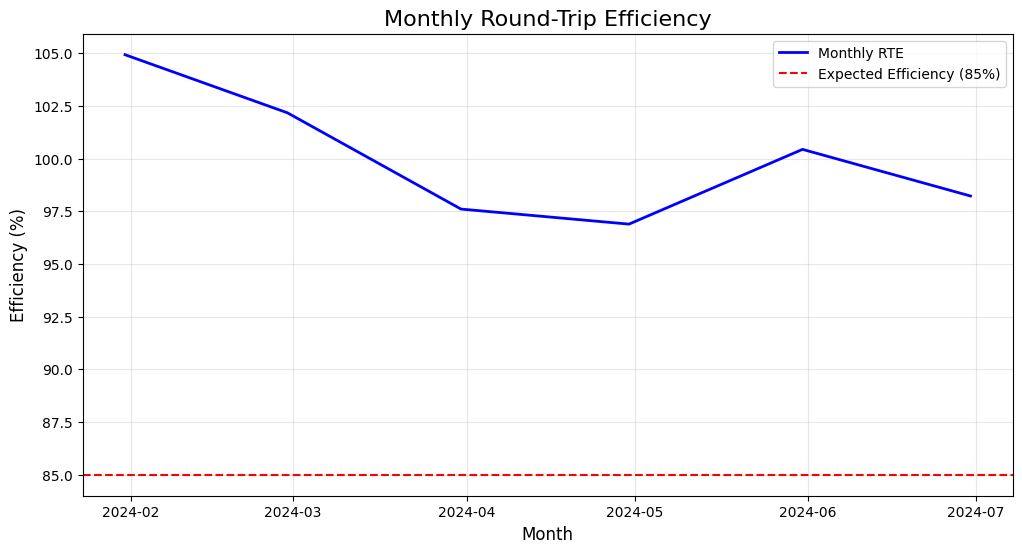

In [160]:
# Monthly RTE Trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_energy['Round-Trip Efficiency'], label='Monthly RTE', color='blue', linewidth=2)
plt.axhline(y=85, color='red', linestyle='--', label='Expected Efficiency (85%)')
plt.title('Monthly Round-Trip Efficiency', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Efficiency (%)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [161]:
# Operational Mode Comparison
mode_rte = data.groupby('Operational Mode')[['Charged Energy', 'Discharged Energy']].sum()
mode_rte['Round-Trip Efficiency'] = (mode_rte['Discharged Energy'] / mode_rte['Charged Energy']) * 100
print("\nAverage RTE by Operational Mode:\n", mode_rte[['Round-Trip Efficiency']])



Average RTE by Operational Mode:
                       Round-Trip Efficiency
Operational Mode                           
Energy Arbitrage                  98.656655
Frequency Regulation             103.080818
Peak Shaving                      98.503259


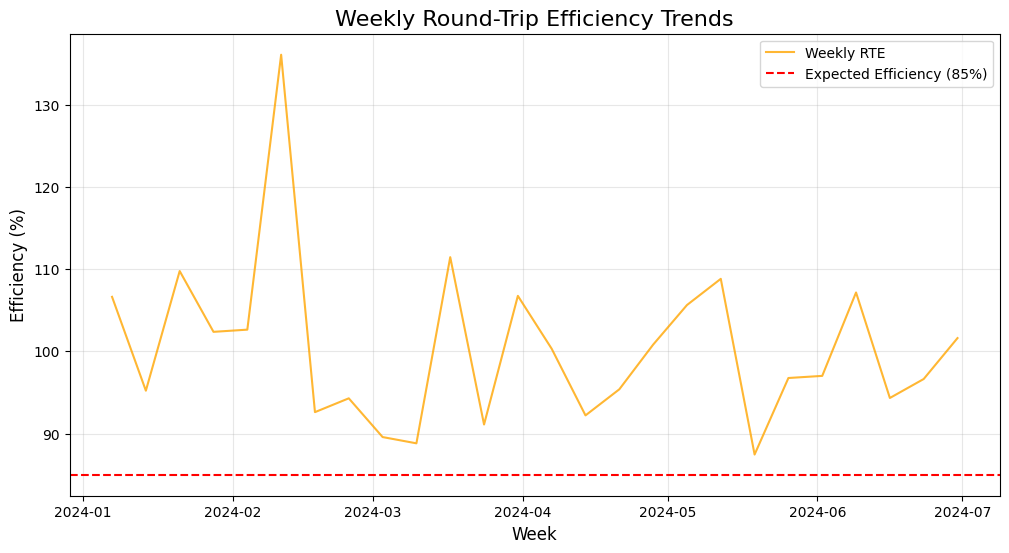

In [162]:
# Seasonal Analysis: Weekly Aggregation
weekly_energy = data.resample('W').sum()
weekly_energy['Round-Trip Efficiency'] = (weekly_energy['Discharged Energy'] / weekly_energy['Charged Energy']) * 100

plt.figure(figsize=(12, 6))
plt.plot(weekly_energy['Round-Trip Efficiency'], label='Weekly RTE', color='orange', alpha=0.8)
plt.axhline(y=85, color='red', linestyle='--', label='Expected Efficiency (85%)')
plt.title('Weekly Round-Trip Efficiency Trends', fontsize=16)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Efficiency (%)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


<ipython-input-163-5fe69aa89fd8>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  soc_rte = data.groupby('SOC Range')[['Charged Energy', 'Discharged Energy']].sum()



RTE by SOC Range:
            Round-Trip Efficiency
SOC Range                       
0-20%                        NaN
20-40%                110.832373
40-60%                 94.886074
60-80%                100.245983
80-100%                      NaN


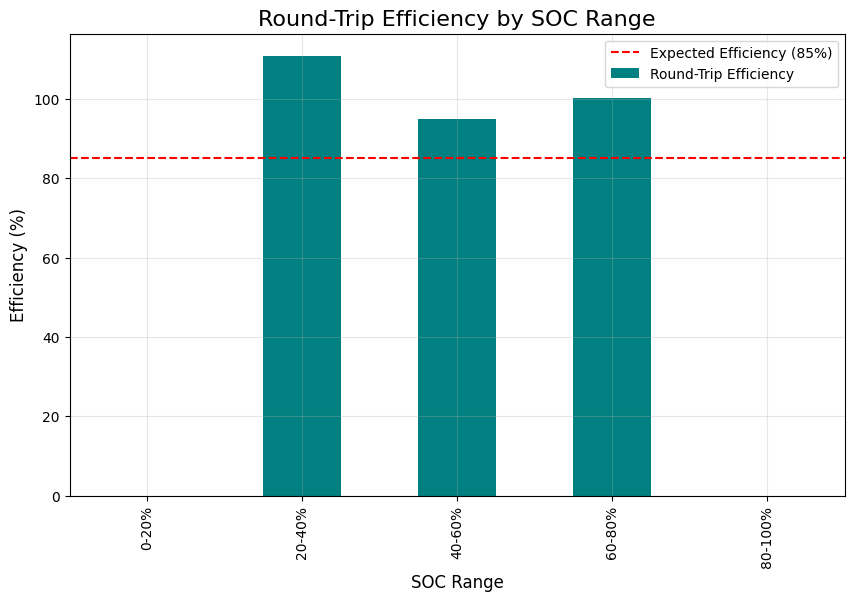

In [163]:
# SOC and Efficiency Analysis
data['SOC Range'] = pd.cut(data['SOC'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])
soc_rte = data.groupby('SOC Range')[['Charged Energy', 'Discharged Energy']].sum()
soc_rte['Round-Trip Efficiency'] = (soc_rte['Discharged Energy'] / soc_rte['Charged Energy']) * 100
print("\nRTE by SOC Range:\n", soc_rte[['Round-Trip Efficiency']])

# Plot RTE by SOC Range
soc_rte['Round-Trip Efficiency'].plot(kind='bar', color='teal', figsize=(10, 6))
plt.title('Round-Trip Efficiency by SOC Range', fontsize=16)
plt.xlabel('SOC Range', fontsize=12)
plt.ylabel('Efficiency (%)', fontsize=12)
plt.axhline(y=85, color='red', linestyle='--', label='Expected Efficiency (85%)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()



### **More Explorations of RTE**

In [164]:
# SOC Range and Degradation Impact
soc_rte_degradation = data.groupby(['SOC Range', 'Operational Mode'])[['Charged Energy', 'Discharged Energy']].sum()
soc_rte_degradation['Round-Trip Efficiency'] = (soc_rte_degradation['Discharged Energy'] / soc_rte_degradation['Charged Energy']) * 100
soc_rte_degradation = soc_rte_degradation.reset_index()
print("\nSOC Range and RTE by Mode:\n", soc_rte_degradation[['SOC Range', 'Operational Mode', 'Round-Trip Efficiency']])


SOC Range and RTE by Mode:
    SOC Range      Operational Mode  Round-Trip Efficiency
0      0-20%      Energy Arbitrage                    NaN
1      0-20%  Frequency Regulation                    NaN
2      0-20%          Peak Shaving                    NaN
3     20-40%      Energy Arbitrage              98.236137
4     20-40%  Frequency Regulation             114.983241
5     20-40%          Peak Shaving             120.639273
6     40-60%      Energy Arbitrage              98.363941
7     40-60%  Frequency Regulation              97.471666
8     40-60%          Peak Shaving              89.327738
9     60-80%      Energy Arbitrage              99.653995
10    60-80%  Frequency Regulation             103.070240
11    60-80%          Peak Shaving              98.097343
12   80-100%      Energy Arbitrage                    NaN
13   80-100%  Frequency Regulation                    NaN
14   80-100%          Peak Shaving                    NaN


<ipython-input-164-ae0f7e21bee8>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  soc_rte_degradation = data.groupby(['SOC Range', 'Operational Mode'])[['Charged Energy', 'Discharged Energy']].sum()


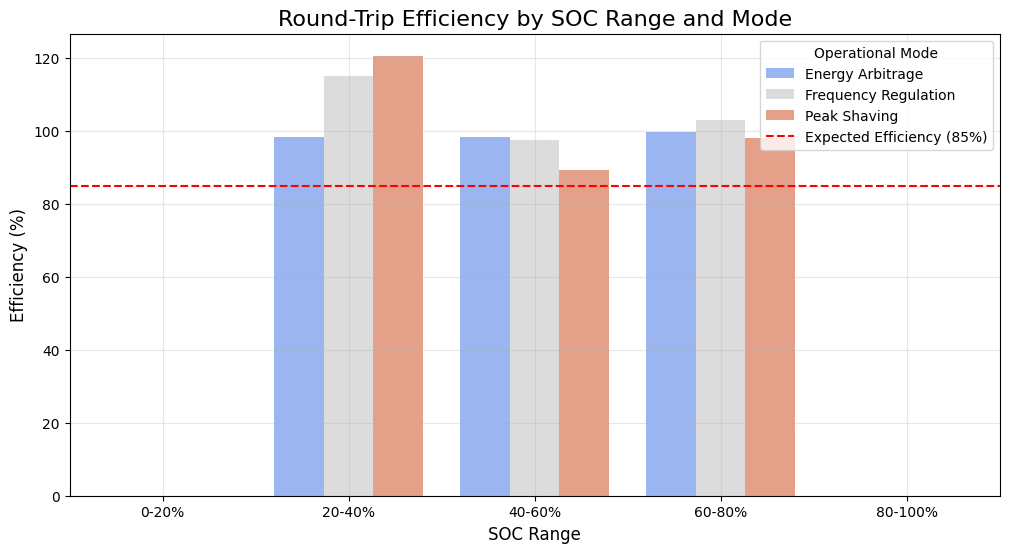

In [165]:
# Visualize SOC Range and RTE
plt.figure(figsize=(12, 6))
sns.barplot(data=soc_rte_degradation, x='SOC Range', y='Round-Trip Efficiency', hue='Operational Mode', palette='coolwarm')
plt.title('Round-Trip Efficiency by SOC Range and Mode', fontsize=16)
plt.xlabel('SOC Range', fontsize=12)
plt.ylabel('Efficiency (%)', fontsize=12)
plt.axhline(y=85, color='red', linestyle='--', label='Expected Efficiency (85%)')
plt.legend(title='Operational Mode')
plt.grid(alpha=0.3)
plt.show()


In [166]:
# Hourly Trends
data['Hour'] = data.index.hour
hourly_power = data.groupby(['Hour', 'Operational Mode'])['Power Output/Input'].mean().unstack()

# Efficiency by Time of Day
hourly_rte = data.groupby('Hour')[['Charged Energy', 'Discharged Energy']].sum()
hourly_rte['Round-Trip Efficiency'] = (hourly_rte['Discharged Energy'] / hourly_rte['Charged Energy']) * 100
print("\nRTE by Hour of Day:\n", hourly_rte['Round-Trip Efficiency'])



RTE by Hour of Day:
 Hour
0     101.985896
1     104.912767
2     100.132252
3      96.427786
4      94.811783
5      98.710602
6     111.514164
7     110.405064
8     105.844921
9     103.440220
10    110.417696
11     91.697631
12     89.280891
13    112.005347
14    102.240941
15     99.441033
16     93.733400
17     94.325793
18     94.499752
19    109.991048
20     86.389698
21    108.765786
22     98.476464
23     88.731896
Name: Round-Trip Efficiency, dtype: float64


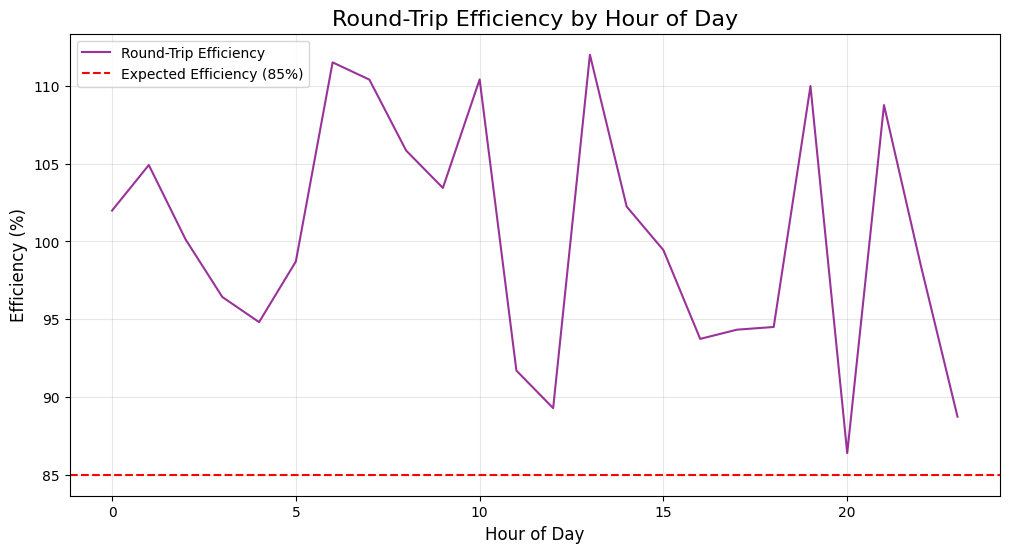

In [167]:
# Visualize Hourly RTE
plt.figure(figsize=(12, 6))
hourly_rte['Round-Trip Efficiency'].plot(kind='line', color='purple', alpha=0.8)
plt.title('Round-Trip Efficiency by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Efficiency (%)', fontsize=12)
plt.axhline(y=85, color='red', linestyle='--', label='Expected Efficiency (85%)')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

In [168]:
# Efficiency by Operational Mode
mode_efficiency = data.groupby('Operational Mode')[['Charged Energy', 'Discharged Energy']].sum()
mode_efficiency['Round-Trip Efficiency'] = (mode_efficiency['Discharged Energy'] /
                                            mode_efficiency['Charged Energy']) * 100
print("\nRTE by Operational Mode:\n", mode_efficiency[['Round-Trip Efficiency']])


RTE by Operational Mode:
                       Round-Trip Efficiency
Operational Mode                           
Energy Arbitrage                  98.656655
Frequency Regulation             103.080818
Peak Shaving                      98.503259


In [169]:
# Revenue vs. Power Patterns
data['Revenue'] = data['Power Output/Input'] * data['Market Price'] * 0.25
revenue_power = data.groupby('Operational Mode')['Revenue'].sum()
print("\nTotal Revenue by Operational Mode:\n", revenue_power)


Total Revenue by Operational Mode:
 Operational Mode
Energy Arbitrage       -22226.930256
Frequency Regulation    28205.670946
Peak Shaving           -25883.862620
Name: Revenue, dtype: float64


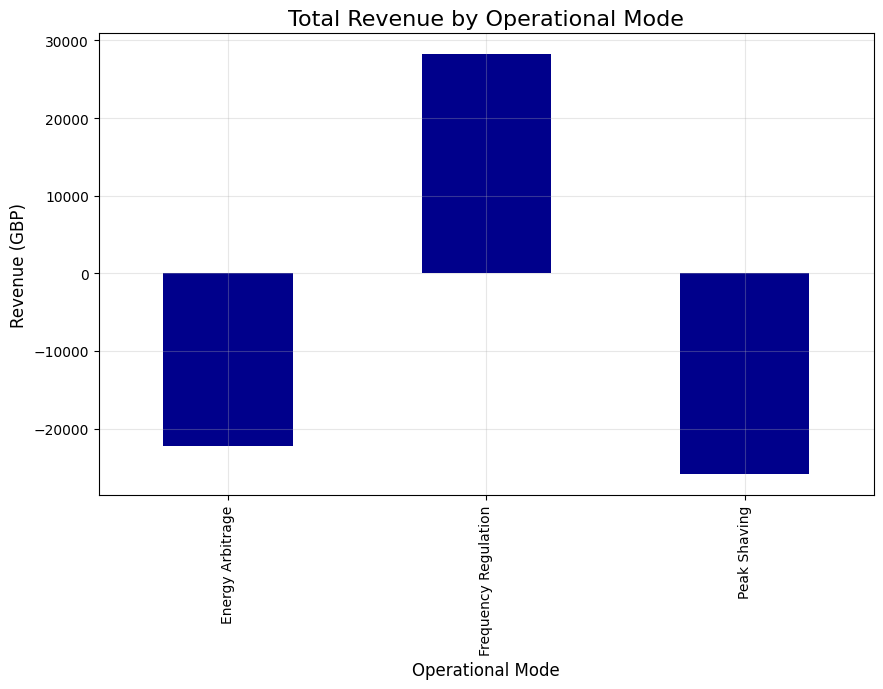

In [170]:
# Visualize Revenue vs. Operational Mode
revenue_power.plot(kind='bar', color='darkblue', figsize=(10, 6))
plt.title('Total Revenue by Operational Mode', fontsize=16)
plt.xlabel('Operational Mode', fontsize=12)
plt.ylabel('Revenue (GBP)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


## General InSight On Impact of BESS Degradation on Round-Trip Efficiency Over Time

### **1. Finding from Daily Round-Trip Efficiency (RTE) Trend Over Time**
- The daily efficiency fluctuates significantly, with frequent dips below the **Expected Efficiency (85%)** and nearing the **Critical Threshold (80%)**.
- **Long-Term Trend:**  
   Efficiency does not stabilize consistently above 85%, showing clear signs of degradation.  
- **Sharp Declines:**  
   Toward the later days (Day 120-150), sharper and more frequent drops in efficiency are observed, indicating worsening degradation over time.

---

### **2. Observations Derived from Round-Trip Efficiency by SOC Range**
- **SOC Range Efficiency Trends:**  
   - **20-40% SOC Range:** Exhibits the highest RTE Above 100%, indicating optimal performance at moderate SOC levels.  
   - **40-60% SOC Range:** Shows reflects efficiency (~95%), showing early signs of degradation.  
   - **60-80% SOC Range:** Maintains ~100% efficiency but did not outperform the lower SOC range.  
- **Degradation Impact:**  
   Lower SOC ranges remain very efficient, while mid-SOC ranges shows efficiency losses due to system degradation.

---

### **Summarization  of Impact**
1. **Efficiency Loss Over Time:**  
   Daily efficiency reduces over time, particularly evident in later Days (Days 120-150).
2. **SOC Dependency:**  
   Operating within the **20-40% SOC range** maximizes efficiency, while mid-SOC ranges (40-60%) show signs of degradation.
3. **Long-Term Effect:**  
   Unsolved degradation mIght lead to increased efficiency losses and may affect performance during critical demand periods.

---

### **Recommendation**
- **Optimal Rest Period:**  
   Schedule the two-week rest period during the later stages of the observed period (e.g., Days **120-150**) where degradation is most evident, minimizing further declines.  
- **Operational Strategy:**  
   - Prioritize operation in the **20-40% SOC range** to maximize efficiency.  
   - Conduct maintenance during periods with historically low efficiency to recover performance.


# **Power Output/Input Patterns Analysis**
To analyze power patterns:

1. Aggregate by Operational Mode:
    * Calculate total energy used for charging and discharging by mode.
2. Daily Trends:
    * Visualize total daily Power Output/Input trends.
3. Peak Usage:
    * Identify peak charging and discharging times.


In [171]:
# Aggregate Power Usage by Operational Mode
power_mode = data.groupby('Operational Mode')['Power Output/Input'].sum()
print("\nTotal Power Output/Input by Operational Mode:\n", power_mode)


Total Power Output/Input by Operational Mode:
 Operational Mode
Energy Arbitrage        -973.288360
Frequency Regulation    2192.929139
Peak Shaving           -1107.637289
Name: Power Output/Input, dtype: float64


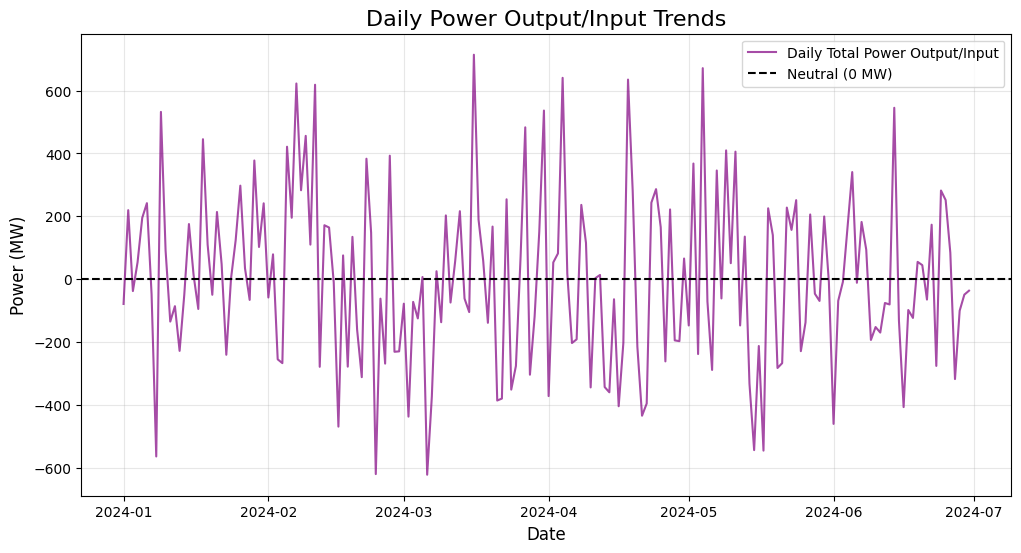

In [172]:
# Daily Power Trends
daily_power = data['Power Output/Input'].resample('D').sum()

# Plot Daily Power Trends
plt.figure(figsize=(12, 6))
plt.plot(daily_power, label='Daily Total Power Output/Input', color='purple', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--', label='Neutral (0 MW)')
plt.title('Daily Power Output/Input Trends', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Power (MW)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [173]:
# Identifying Peak Charging and Discharging Instances
peak_charging = data[data['Power Output/Input'] < 0].nlargest(5, 'Power Output/Input')
peak_discharging = data[data['Power Output/Input'] > 0].nlargest(5, 'Power Output/Input')

# Display Peak Instances
print("\nPeak Charging Instances:\n", peak_charging[['Power Output/Input', 'SOC', 'Hour']])



Peak Charging Instances:
                      Power Output/Input        SOC  Hour
Timestamp                                               
2024-03-22 20:45:00           -0.006014  50.702691    20
2024-01-04 03:45:00           -0.009111  33.244056     3
2024-01-22 13:45:00           -0.012791  50.737292    13
2024-04-12 23:45:00           -0.026826  48.550162    23
2024-03-14 15:45:00           -0.026857  46.983631    15


based on the top 5 peak charging Instances, we can say that the 20th hour of the 22nd Day of march recoded the highest charging instances with a state of charge of 50.7026

In [174]:
print("\nPeak Discharging Instances:\n", peak_discharging[['Power Output/Input', 'SOC', 'Hour']])



Peak Discharging Instances:
                      Power Output/Input        SOC  Hour
Timestamp                                               
2024-05-31 14:00:00           49.991874  47.697825    14
2024-04-15 15:00:00           49.985563  51.646472    15
2024-02-10 14:30:00           49.985528  63.707550    14
2024-01-04 13:00:00           49.981401  44.834112    13
2024-05-13 03:30:00           49.980159  47.257310     3


based on the top 5 peak Discharging instance, can say that the 14th hour of the 31st day of the month of may recorded the peak Discharging Instances of about 47.6978 state of charge

In [175]:
# Top 10% High Power Output Periods
high_power = data[data['Power Output/Input'] > data['Power Output/Input'].quantile(0.9)]
high_power_summary = high_power.groupby('Operational Mode')[['Power Output/Input']].mean()
print("\nTop 10% High Power Output Periods Summary by Operational Mode:")
high_power_summary



Top 10% High Power Output Periods Summary by Operational Mode:


,Power Output/Input
Operational Mode,
Energy Arbitrage,45.018839
Frequency Regulation,44.886972
Peak Shaving,45.196566



### Insights:
- **Peak Shaving** has the highest average efficiency (45.197), making it the most effective operational mode.
- **Frequency Regulation** has the lowest efficiency (44.887), though the difference between modes is minimal.
- **Energy Arbitrage** performs slightly better than Frequency Regulation but lower than Peak Shaving.

### Implication:
This comparison helps in choosing the most efficient operational mode, with **Peak Shaving** being the preferred option for maximizing power output/input.

<ipython-input-176-630761aa77cc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=high_power_summary.reset_index(), x='Operational Mode', y='Power Output/Input', palette='viridis')


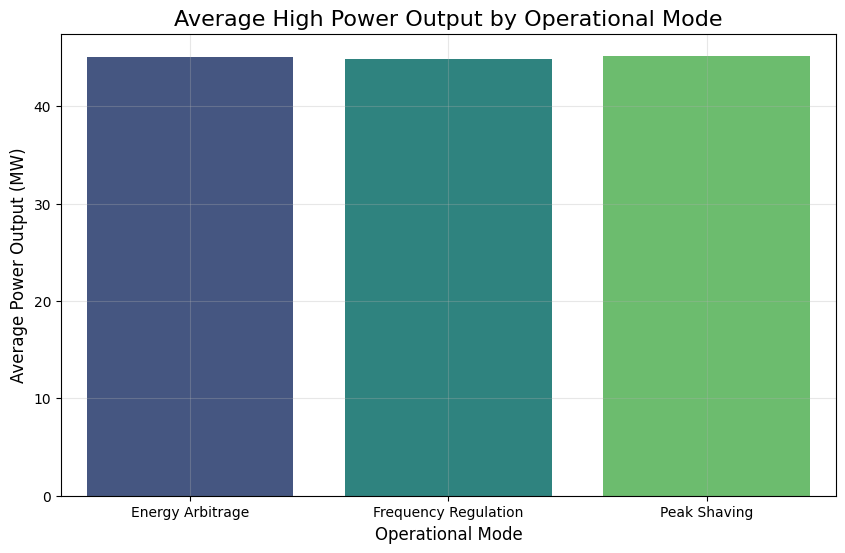

In [176]:
# Visualize High Power Output
plt.figure(figsize=(10, 6))
sns.barplot(data=high_power_summary.reset_index(), x='Operational Mode', y='Power Output/Input', palette='viridis')
plt.title('Average High Power Output by Operational Mode', fontsize=16)
plt.xlabel('Operational Mode', fontsize=12)
plt.ylabel('Average Power Output (MW)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


In [177]:
# Market Price Volatility Analysis
data['Price Volatility'] = data['Market Price'].diff().abs()
volatility_power = data.groupby(pd.qcut(data['Price Volatility'], 4))['Power Output/Input'].mean()
print("Average Power Output?input by Price Volatility:")
volatility_power

Average Power Output?input by Price Volatility:


<ipython-input-177-3c63690f8628>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  volatility_power = data.groupby(pd.qcut(data['Price Volatility'], 4))['Power Output/Input'].mean()


,Power Output/Input
Price Volatility,
"(0.0006900000000000001, 9.36]",-0.185178
"(9.36, 20.329]",0.634816
"(20.329, 34.922]",-0.312692
"(34.922, 69.471]",-0.104547


The output shows the average **power output/input** across four quartiles of **price volatility**:

- **(0.00069 to 9.36):** Avg = **-0.185** (slight inefficiency).
- **(9.36 to 20.329):** Avg = **0.635** (highest efficiency).
- **(20.329 to 34.922):** Avg = **-0.313** (inefficiency).
- **(34.922 to 69.471):** Avg = **-0.105** (slight improvement but still inefficient).

### Insights:
- Moderate volatility (9.36 to 20.329) yields the best efficiency.
- Both very low and high volatility result in inefficiencies.

Now i will try to compare the efficiency of charging and Discharging cycles

In [178]:
# Efficiency of Charging vs. Discharging Cycles
charging_cycles = data[data['Power Output/Input'] > 0]['Power Output/Input']
discharging_cycles = data[data['Power Output/Input'] < 0]['Power Output/Input']

print("\nAverage Charging Power (MW):", charging_cycles.mean())
print("Average Discharging Power (MW):", discharging_cycles.mean())



Average Charging Power (MW): 24.899706965180886
Average Discharging Power (MW): -25.212689286449365


1. Revenue Optimization Analysis
We aim to:

Maximize Revenue from High-Priced Periods:
Identify and prioritize high market price periods for discharge.
Optimize Charging During Low Prices:
Analyze times when the market price is lowest and ensure charging aligns with these periods.
Profitability by Operational Mode:
Calculate revenue contribution for each operational mode and evaluate performance.


In [179]:
# Revenue Calculation by Operational Mode
data['Revenue'] = data['Power Output/Input'] * data['Market Price'] / 4  # Assuming 15-min intervals
mode_revenue = data.groupby('Operational Mode')['Revenue'].sum()
print("Total Revenue by Operation Mode:")
mode_revenue

Total Revenue by Operation Mode:


,Revenue
Operational Mode,
Energy Arbitrage,-22226.930256
Frequency Regulation,28205.670946
Peak Shaving,-25883.862620


### Insights:  
1. **Frequency Regulation** is the only operational mode yielding positive revenue, with an average of **28,205.67**, making it the most economically viable.  
2. The negative revenues for **Energy Arbitrage** and **Peak Shaving** indicate that their operational costs (e.g., energy storage expenses, battery degradation, or electricity price variations) outweigh the financial benefits they generate. This suggests these modes are not cost-effective under current conditions.  

### Implications:  
- Focus on **Frequency Regulation** as it demonstrates profitability and aligns with maximizing revenue.  
- For **Energy Arbitrage** and **Peak Shaving**, reevaluate operational strategies to minimize costs, improve battery efficiency, or identify better market conditions to enhance profitability.  
- This analysis underscores the need to optimize resource allocation and tailor operations to the most financially sustainable mode.  

<ipython-input-180-56ee1c2392eb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mode_revenue.index, y=mode_revenue.values, palette='coolwarm')


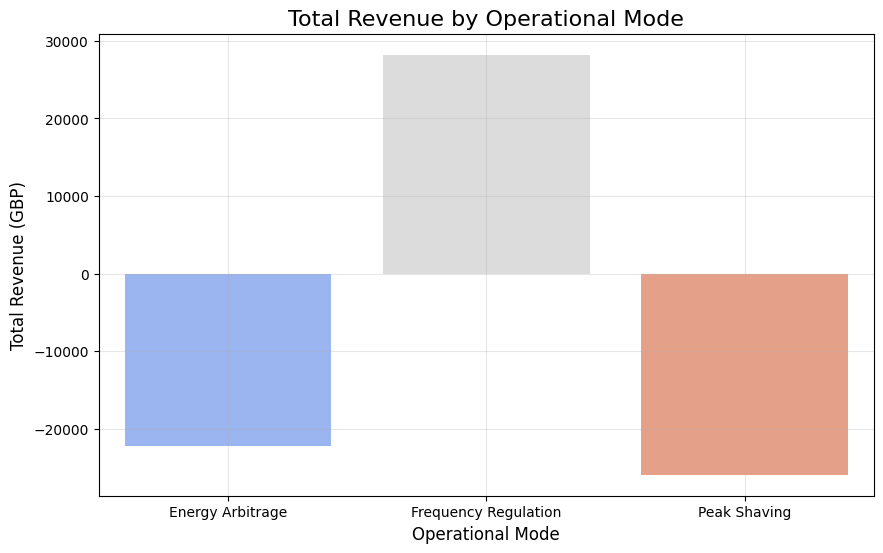

In [180]:
# Visualize Revenue by Operational Mode
plt.figure(figsize=(10, 6))
sns.barplot(x=mode_revenue.index, y=mode_revenue.values, palette='coolwarm')
plt.title('Total Revenue by Operational Mode', fontsize=16)
plt.xlabel('Operational Mode', fontsize=12)
plt.ylabel('Total Revenue (GBP)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


In [181]:
# High Price Periods for Discharge
high_price = data[data['Market Price'] > data['Market Price'].quantile(0.9)]
high_price_summary = high_price.groupby('Operational Mode')[['Power Output/Input', 'Revenue']].mean()
print("High Price Periods Summary by Operational Mode:")
high_price_summary

High Price Periods Summary by Operational Mode:


,Power Output/Input,Revenue
Operational Mode,,
Energy Arbitrage,-1.868382,-44.721472
Frequency Regulation,0.333248,8.933329
Peak Shaving,-1.723376,-41.680599


In [182]:
# Low Price Periods for Charging
low_price = data[data['Market Price'] < data['Market Price'].quantile(0.1)]
low_price_summary = low_price.groupby('Operational Mode')[['Power Output/Input', 'Revenue']].mean()
low_price_summary


,Power Output/Input,Revenue
Operational Mode,,
Energy Arbitrage,-1.751679,-14.537328
Frequency Regulation,2.238052,18.086060
Peak Shaving,0.241897,2.566695


### **Operational Recommendations**
Using the above insights, let us try to propose actionable recommendations.

Key Metrics to Optimize:
  * Net Revenue Contribution:
Calculate total revenue minus operational costs (charging and discharging inefficiencies).
  * Profitability of Peak Shaving:
Assess the balance between high power output and associated efficiency loss.


In [183]:
# Net Revenue Calculation
data['Net Revenue'] = data['Revenue'] - (data['Charged Energy'] * data['Market Price'] / 4 * (1 - 0.85))  # Adjust for 85% efficiency
net_revenue_mode = data.groupby('Operational Mode')['Net Revenue'].sum()
print("\nNet Revenue by Operational Mode:\n", net_revenue_mode)



Net Revenue by Operational Mode:
 Operational Mode
Energy Arbitrage       -66576.701842
Frequency Regulation   -15683.537668
Peak Shaving           -71449.483299
Name: Net Revenue, dtype: float64


### Insights:  
1. All the operational modes result in **negative net revenue**, indicating that total costs (e.g., operational expenses, maintenance, or system inefficiencies) exceed Income in all cases.  
2. **Frequency Regulation** shows the least negative net revenue (**-15,683.54**), suggesting that it might be relatively more cost-effective Than **Energy Arbitrage** and **Peak Shaving**.  
3. **Peak Shaving** generated the most negative net revenue (**-71,449.48**), indicating it accumulated the highest net losses among the three operational modes.  

### Implications:  
- Focus on improving the efficiency and cost management of **Frequency Regulation**, as it is the closest to breaking even and has the potential to become profitable with optimization.  
- Reassess the economic viability of **Energy Arbitrage** and **Peak Shaving**, prioritizing strategies to reduce costs (e.g., optimizing battery use, minimizing degradation, or leveraging favorable market conditions).  
- Consider shifting resources toward the most promising mode or exploring alternative revenue streams to enhance overall financial performance.  

In [184]:
# Peak Shaving Profitability
peak_shaving_data = data[data['Operational Mode'] == 'Peak Shaving']
peak_shaving_profit = peak_shaving_data['Revenue'].sum() - (peak_shaving_data['Charged Energy'].sum() * (1 - 0.85))
print("\nPeak Shaving Profitability (Adjusted for Efficiency Loss):\n", peak_shaving_profit)



Peak Shaving Profitability (Adjusted for Efficiency Loss):
 -28658.984440919634


### Regression Models and Rolling Averages for Degradation Patterns
We’ll compute rolling averages and fit regression models to detect degradation trends in SOC and Power Output/Input.



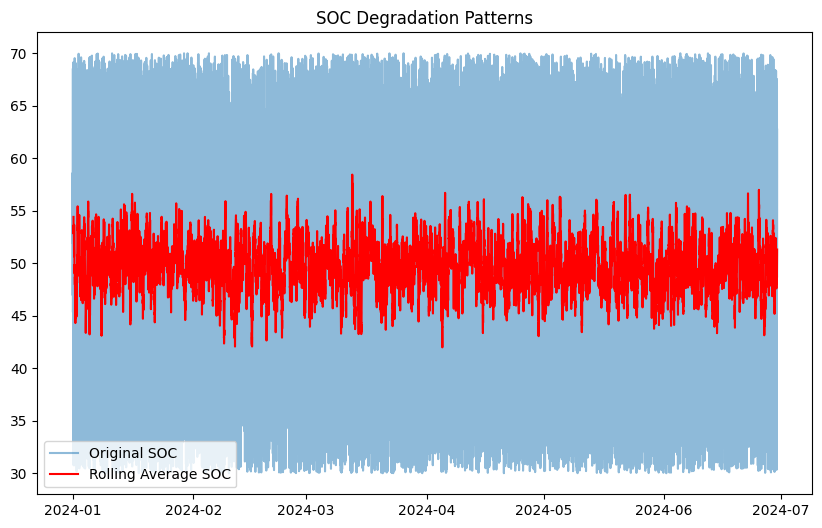

In [185]:
# Calculate a rolling average for SOC and Power Output/Input
data['SOC_RollingAvg'] = data['SOC'].rolling(window=24).mean()  # Adjust window size as needed
data['Power_Output_RollingAvg'] = data['Power Output/Input'].rolling(window=24).mean()

plt.figure(figsize=(10, 6))
plt.plot(data['SOC'], label='Original SOC', alpha=0.5)
plt.plot(data['SOC_RollingAvg'], label='Rolling Average SOC', color='red')
plt.legend()
plt.title("SOC Degradation Patterns")
plt.show()


## **Predictive model: Predicting Hourly Market Price**

In [186]:
xg_data = df.copy()
xg_data.head()

,Timestamp,SOC,Power Output/Input,Frequency Regulation Signal,Operational Mode,Market Price,Hour of Day,Day of Week,Day of Month
0,2024-01-01 00:00:00,51.952540,-28.738790,50.083497,Frequency Regulation,69.305419,0,1,1
1,2024-01-01 00:15:00,58.607575,24.935404,50.175157,Frequency Regulation,97.456370,0,1,1
2,2024-01-01 00:30:00,54.110535,-13.202597,50.044089,Energy Arbitrage,60.762161,0,1,1
3,2024-01-01 00:45:00,51.795327,-19.118928,49.957396,Frequency Regulation,32.653461,0,1,1
4,2024-01-01 01:00:00,46.946192,9.251126,50.146476,Energy Arbitrage,49.730162,1,1,1


In [187]:
from sklearn.preprocessing import MinMaxScaler

# Add time-based features
xg_data['Day'] = xg_data['Timestamp'].dt.day
xg_data['Month'] = xg_data['Timestamp'].dt.month
xg_data['Year'] = xg_data['Timestamp'].dt.year
xg_data['Season'] = xg_data['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else
                                      'Spring' if x in [3, 4, 5] else
                                      'Summer' if x in [6, 7, 8] else 'Fall')

xg_data.head()

,Timestamp,SOC,Power Output/Input,Frequency Regulation Signal,Operational Mode,Market Price,Hour of Day,Day of Week,Day of Month,Day,Month,Year,Season
0,2024-01-01 00:00:00,51.952540,-28.738790,50.083497,Frequency Regulation,69.305419,0,1,1,1,1,2024,Winter
1,2024-01-01 00:15:00,58.607575,24.935404,50.175157,Frequency Regulation,97.456370,0,1,1,1,1,2024,Winter
2,2024-01-01 00:30:00,54.110535,-13.202597,50.044089,Energy Arbitrage,60.762161,0,1,1,1,1,2024,Winter
3,2024-01-01 00:45:00,51.795327,-19.118928,49.957396,Frequency Regulation,32.653461,0,1,1,1,1,2024,Winter
4,2024-01-01 01:00:00,46.946192,9.251126,50.146476,Energy Arbitrage,49.730162,1,1,1,1,1,2024,Winter


In [188]:
xg_data.tail()

,Timestamp,SOC,Power Output/Input,Frequency Regulation Signal,Operational Mode,Market Price,Hour of Day,Day of Week,Day of Month,Day,Month,Year,Season
17372,2024-06-29 23:00:00,67.545050,-46.319357,50.080209,Energy Arbitrage,73.335542,23,6,29,29,6,2024,Summer
17373,2024-06-29 23:15:00,60.482372,12.727201,50.082228,Peak Shaving,46.964789,23,6,29,29,6,2024,Summer
17374,2024-06-29 23:30:00,48.650142,-3.518064,49.957864,Frequency Regulation,49.839074,23,6,29,29,6,2024,Summer
17375,2024-06-29 23:45:00,55.479875,-4.417588,50.037062,Energy Arbitrage,58.624888,23,6,29,29,6,2024,Summer
17376,2024-06-30 00:00:00,62.729080,-36.640617,50.191764,Energy Arbitrage,35.476986,0,7,30,30,6,2024,Summer


In [189]:
# Normalize numeric features
scaler = MinMaxScaler()
xg_data[['SOC', 'Power Output/Input', 'Frequency Regulation Signal', 'Market Price']] = scaler.fit_transform(
    xg_data[['SOC', 'Power Output/Input', 'Frequency Regulation Signal', 'Market Price']]
)


In [190]:
xg_data.head()

,Timestamp,SOC,Power Output/Input,Frequency Regulation Signal,Operational Mode,Market Price,Hour of Day,Day of Week,Day of Month,Day,Month,Year,Season
0,2024-01-01 00:00:00,0.548793,0.212448,0.708707,Frequency Regulation,0.561606,0,1,1,1,1,2024,Winter
1,2024-01-01 00:15:00,0.715185,0.749357,0.937910,Frequency Regulation,0.963836,0,1,1,1,1,2024,Winter
2,2024-01-01 00:30:00,0.602748,0.367858,0.610164,Energy Arbitrage,0.439537,0,1,1,1,1,2024,Winter
3,2024-01-01 00:45:00,0.544862,0.308676,0.393382,Frequency Regulation,0.037910,0,1,1,1,1,2024,Winter
4,2024-01-01 01:00:00,0.423622,0.592465,0.866191,Energy Arbitrage,0.281908,1,1,1,1,1,2024,Winter


### Develop a Time Series Forecasting Models:

four Time series model will be trained and tested, but the best will be futher improved upon, the models are:

* SARIMA Model
* ARIMA model
* XGBOOST Model
* RANDOM FOREST Model

Training The SARIMA MODEL

In [191]:
# import liberary
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [192]:
# Setting Market Price as the target variable
market_price = xg_data.set_index('Timestamp')['Market Price']


In [193]:
# sampling data to hourly frequency (60 minutes)
market_price = market_price.resample('h').mean()

In [194]:
# splitting dataset to Train-test split
train_size = int(0.8 * len(market_price))
train, test = market_price[:train_size], market_price[train_size:]

In [195]:
# SARIMA model
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))  # 24 = daily frequency with 15-min intervals
sarima_result = sarima_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [196]:
# Forecasting using the Sarima Model
forecast = sarima_result.forecast(steps=len(test))
mse = mean_squared_error(test, forecast)
print(f"Mean Squared Error for the Sarima model: {mse}")


Mean Squared Error for the Sarima model: 0.02128497691411652


An MSE of 0.021 suggests good model performance.

## Training The ARIMA Model

In [197]:
ar_data = df.copy()

In [198]:
# Ensuring Timestamp column is properly parsed as datetime
ar_data['Timestamp'] = pd.to_datetime(ar_data['Timestamp'])

# Seting Market Price as the target variable and index by Timestamp
market_price = ar_data.set_index('Timestamp')['Market Price']

# Resample data to hourly frequency
market_price = market_price.resample('h').mean().interpolate()  # Filling missing values using interpolation

# Train-test split (80% training, 20% testing)
train_size = int(0.8 * len(market_price))
train, test = market_price[:train_size], market_price[train_size:]

# Define and fit the SARIMA model (with daily seasonality for hourly data)
try:
    sarima_model = SARIMAX(
        train,
        order=(1, 1, 1),  # ARIMA (p, d, q) order
        seasonal_order=(1, 1, 1, 24),  # Seasonal (P, D, Q, s) order, s=24 for daily seasonality in hourly data
        enforce_stationarity=False,  # Relax stationarity assumption
        enforce_invertibility=False  # Relax invertibility assumption
    )
    sarima_result = sarima_model.fit(disp=False)

    # Forecasting
    forecast = sarima_result.forecast(steps=len(test))
    mse = mean_squared_error(test, forecast)
    print(f"Mean Squared Error: {mse}")

    # Display model summary
    print(sarima_result.summary())

except Exception as e:
    print(f"Model fitting failed: {e}")


Mean Squared Error: 104.22738991986654
                                     SARIMAX Results                                      
Dep. Variable:                       Market Price   No. Observations:                 3476
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood              -12874.327
Date:                            Mon, 16 Dec 2024   AIC                          25758.654
Time:                                    11:03:13   BIC                          25789.349
Sample:                                01-01-2024   HQIC                         25769.621
                                     - 05-24-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0131      0.017     -0.769      0.442      -0.046       0.

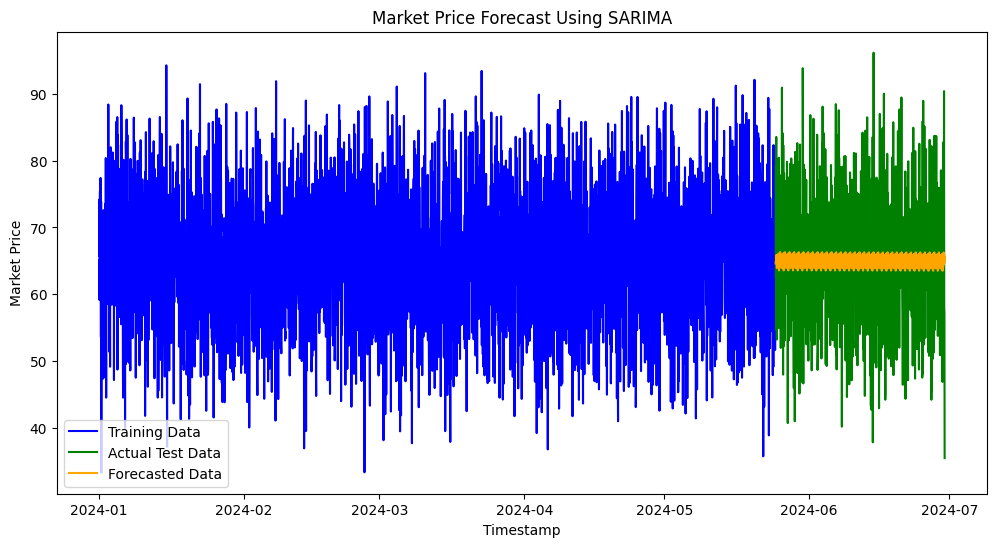

In [199]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label="Training Data", color="blue")
plt.plot(test.index, test, label="Actual Test Data", color="green")
plt.plot(test.index, forecast, label="Forecasted Data", color="orange")
plt.title("Market Price Forecast Using SARIMA")
plt.xlabel("Timestamp")
plt.ylabel("Market Price")
plt.legend()
plt.show()


## **Training Random Forest Model and XGBOOST Model**


In [200]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error


loading the datasets

In [201]:
FR_data = df.copy()

## RANDOM FOREST

In [202]:

# One-hot encode the 'Operational Mode' column
FR_data = pd.get_dummies(FR_data, columns=['Operational Mode'], drop_first=True)

# Define features (X) and target (y)
X = FR_data.drop(columns=['Timestamp', 'Market Price'])
y = FR_data['Market Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [203]:
# Random Forest Model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Random Forest MSE: {rf_mse}")


Random Forest MSE: 429.3714710952141


# XGBOOST MODEL


In [204]:
# XGBoost Model
xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.5)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
print(f"XGBoost MSE: {xgb_mse}")

XGBoost MSE: 514.3213559366178


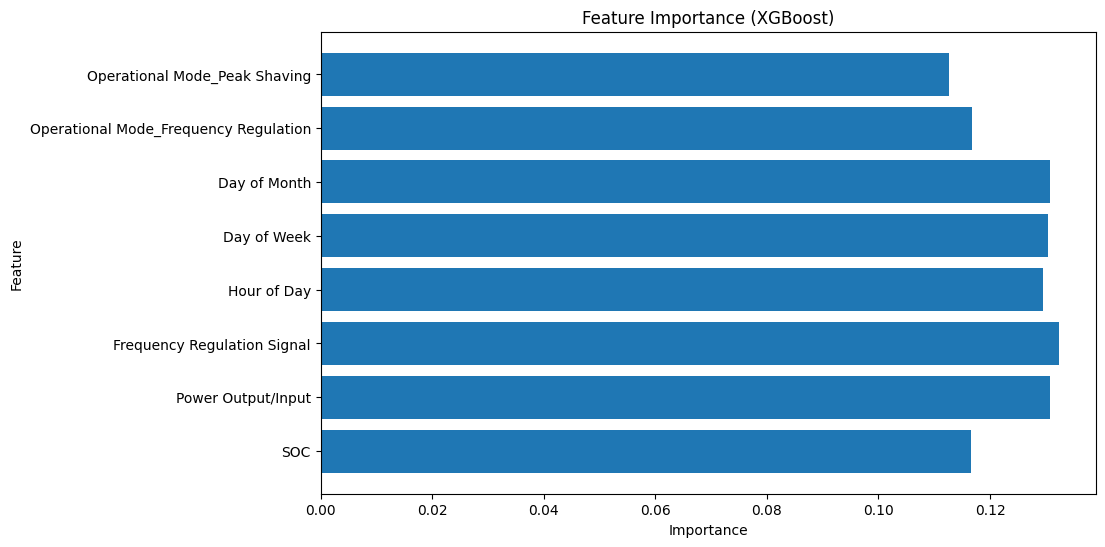

In [205]:
# Feature importance visualization for XGBoost
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(X.columns, xgb_model.feature_importances_)
plt.title('Feature Importance (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


## **Comparing Models**

In [206]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import GridSearchCV


In [207]:
# Metrics Calculation Function
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"Model: {model_name}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-squared: {r2}")
    print("-" * 40)
    return {"model": model_name, "mse": mse, "mae": mae, "r2": r2}


In [208]:
# Compare Random Forest
rf_metrics = evaluate_model(y_test, rf_predictions, "Random Forest")

Model: Random Forest
Mean Squared Error (MSE): 429.3714710952141
Mean Absolute Error (MAE): 17.786313228527796
R-squared: -0.053597295534856926
----------------------------------------


In [209]:
# Compare XGBoost
xgb_metrics = evaluate_model(y_test, xgb_predictions, "XGBoost")

Model: XGBoost
Mean Squared Error (MSE): 514.3213559366178
Mean Absolute Error (MAE): 19.032062912311442
R-squared: -0.26204842689810715
----------------------------------------


In [210]:
# Compare SARIMAX
sarima_forecast = sarima_result.forecast(steps=len(y_test))
sarima_metrics = evaluate_model(y_test.values, sarima_forecast, "SARIMAX")

Model: SARIMAX
Mean Squared Error (MSE): 408.2299325171405
Mean Absolute Error (MAE): 17.474038110224853
R-squared: -0.0017199134337888555
----------------------------------------


In [211]:
# Compare ARIMA
arima_model = ARIMA(train, order=(1, 1, 1))
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=len(y_test))
arima_metrics = evaluate_model(y_test.values, arima_forecast, "ARIMA")

Model: ARIMA
Mean Squared Error (MSE): 407.7099190884905
Mean Absolute Error (MAE): 17.472802675036373
R-squared: -0.00044389772489683565
----------------------------------------


In [212]:
# Collect all metrics
all_metrics = [rf_metrics, xgb_metrics, sarima_metrics, arima_metrics]
best_model = sorted(all_metrics, key=lambda x: x["mse"])[0]
print(f"Best Model: {best_model['model']} with MSE: {best_model['mse']}")


Best Model: ARIMA with MSE: 407.7099190884905


THe best Model is ARiMA with MSE of 407.71

## **HyperParameter Tunning Of ARIMA MODEL**

In [213]:
import itertools
from statsmodels.tsa.arima.model import ARIMA

In [214]:
# Define the range of parameters for p, d, q
p = range(0, 4)  # Test values of AR terms
d = range(0, 3)  # Test values of differencing
q = range(0, 4)  # Test values of MA terms

# Create all possible combinations of p, d, q
pdq_combinations = list(itertools.product(p, d, q))

In [215]:
# Function to evaluate ARIMA models
def evaluate_arima_order(train_data, pdq_combinations):
    results = []
    for pdq in pdq_combinations:
        try:
            # Fit the ARIMA model
            model = ARIMA(train_data, order=pdq)
            result = model.fit()
            # Append the parameters and AIC score
            results.append((pdq, result.aic))
        except:
            # Skip combinations that fail
            continue
    return results


In [216]:
# Perform Grid Search
print("Performing grid search for ARIMA parameters...")
arima_results = evaluate_arima_order(train, pdq_combinations)

Performing grid search for ARIMA parameters...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.p

In [217]:
# Convert results to a DataFrame
arima_results_df = pd.DataFrame(arima_results, columns=['Parameters', 'AIC'])
best_params = arima_results_df.loc[arima_results_df['AIC'].idxmin()]
print(f"Best ARIMA Parameters: {best_params['Parameters']} with AIC: {best_params['AIC']}")

Best ARIMA Parameters: (2, 0, 2) with AIC: 26012.01847040483


The best parameter for are p = 2, d = 0, q = 2 with AIC score of 26012

In [218]:
# Train ARIMA with the best parameters
best_order = best_params['Parameters']
best_arima_model = ARIMA(train, order=best_order).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [219]:
# Forecast using the best ARIMA model
arima_forecast = best_arima_model.forecast(steps=len(test))


In [220]:
# Evaluate the model on the test set
mse = mean_squared_error(test, arima_forecast)
mae = mean_absolute_error(test, arima_forecast)
r2 = r2_score(test, arima_forecast)

print(f"Best ARIMA Model Performance on Test Set:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")


Best ARIMA Model Performance on Test Set:
Mean Squared Error (MSE): 103.52729085661285
Mean Absolute Error (MAE): 8.344386791440696
R-squared: -0.0023358391468542017


The MSE, MEA and R_square scores have Improved meaning the model performance have been improved

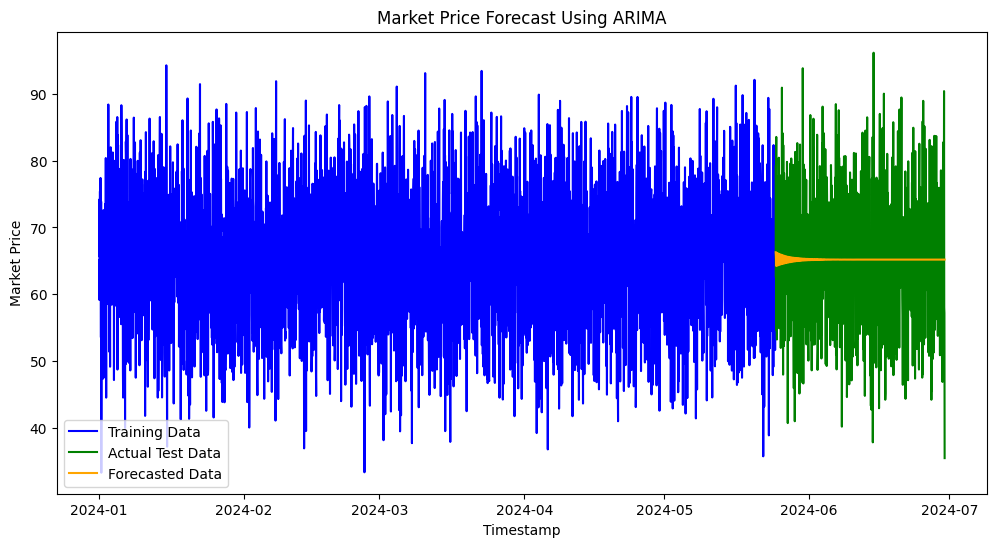

In [221]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label="Training Data", color="blue")
plt.plot(test.index, test, label="Actual Test Data", color="green")
plt.plot(test.index, arima_forecast, label="Forecasted Data", color="orange")
plt.title("Market Price Forecast Using ARIMA")
plt.xlabel("Timestamp")
plt.ylabel("Market Price")
plt.legend()
plt.show()


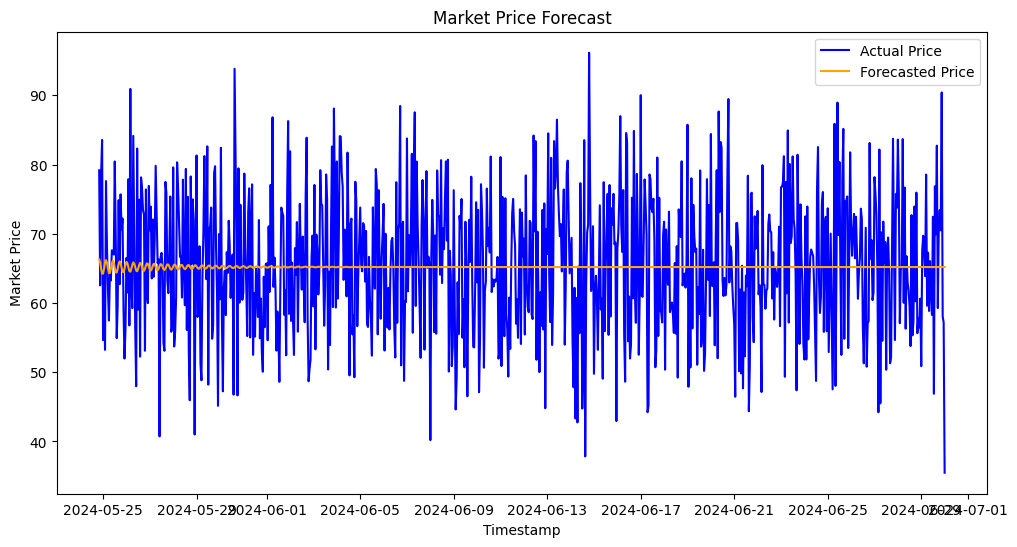

In [222]:
# plot the chart
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual Price', color='blue')
plt.plot(test.index, arima_forecast, label='Forecasted Price', color='orange')
plt.legend()
plt.title('Market Price Forecast')
plt.xlabel('Timestamp')
plt.ylabel('Market Price')
plt.show()


## Insights for Scheduling Rest Period of BESS System

### Key Insights
1. **Constant Forecasted Price**:  
   - The forecasted market price (orange line) remains relatively constant over the analyzed period, while actual prices (blue) fluctuate significantly.  
   - This indicates a stable and predictable price period where opportunities for energy arbitrage are limited.

2. **Optimal Scheduling**:  
   - The **Rest Period** can be scheduled during the stable forecasted price window to minimize revenue loss.  
   - Periods with **low price volatility** are ideal as they present minimal risk of missed arbitrage opportunities.

### Recommendation
- Select a two-week period where the **forecasted price** remains stable and actual price volatility is reduced.  
- This ensures that the economic impact of the BESS resting period is minimized.

### Suggested Period
Based on the chart, the optimal Rest Period is:  
**"From 2024-05-25 to 2024-06-08"**  
This period shows consistent forecasted prices and relatively low price spikes, making it an ideal time for the BESS system to rest.


### **Optimize BESS Operation Strategy**
Objective:

Maximizing the  profits by switching between Energy Arbitrage and Frequency Regulation based on forecasted prices.

Approach:

1. Define profit function:
    
    Profit
=
(
Market Price
×
Power Output/Input
)
−
Operational Costs
2. Create logic to decide:
Switch to Energy Arbitrage when price differences (buy low, sell high) are profitable.
Use Frequency Regulation if energy arbitrage isn't profitable.


In [223]:
def bess_strategy(forecasted_prices, current_soc, min_soc=20, max_soc=80,
                  threshold_high=0.8, threshold_low=0.2, charge_rate=5, discharge_rate=5):
    operation_modes = []
    for price in forecasted_prices:
        if price > threshold_high and current_soc > min_soc:
            operation_modes.append('Energy Arbitrage')
            current_soc -= discharge_rate
        elif price < threshold_low and current_soc < max_soc:
            operation_modes.append('Charge')
            current_soc += charge_rate
        else:
            operation_modes.append('Frequency Regulation')
        # Debugging print statement
        print(f"Price: {price}, Current SOC: {current_soc}, Mode: {operation_modes[-1]}")
    return operation_modes


In [224]:
# Generate operation strategy
Arima_forecasted_prices = arima_forecast[:10]
Arima_strategy = bess_strategy(Arima_forecasted_prices, current_soc=50)
print(Arima_strategy)


Price: 66.29550537006173, Current SOC: 45, Mode: Energy Arbitrage
Price: 65.85343467691551, Current SOC: 40, Mode: Energy Arbitrage
Price: 64.93889369221569, Current SOC: 35, Mode: Energy Arbitrage
Price: 64.23560110341242, Current SOC: 30, Mode: Energy Arbitrage
Price: 64.25334459965352, Current SOC: 25, Mode: Energy Arbitrage
Price: 64.95903623435933, Current SOC: 20, Mode: Energy Arbitrage
Price: 65.8160902059025, Current SOC: 20, Mode: Frequency Regulation
Price: 66.19188020276876, Current SOC: 20, Mode: Frequency Regulation
Price: 65.82426975496696, Current SOC: 20, Mode: Frequency Regulation
Price: 65.00349997560367, Current SOC: 20, Mode: Frequency Regulation
['Energy Arbitrage', 'Energy Arbitrage', 'Energy Arbitrage', 'Energy Arbitrage', 'Energy Arbitrage', 'Energy Arbitrage', 'Frequency Regulation', 'Frequency Regulation', 'Frequency Regulation', 'Frequency Regulation']


### Some Insights from Optimized BESS Operation Strategy:

1. **Energy Arbitrage Utilization**:  
   The battery prioritizes Energy Arbitrage when market prices are high, discharging energy until the minimum SOC threshold (20%) is reached.

2. **SOC Constraint Impact**:  
   Once the SOC hits 20%, the system switches to Frequency Regulation, limiting further Energy Arbitrage opportunities despite favorable prices.

3. **Stable Price Trends**:  
   With stable high prices, the inability to discharge below the SOC limit highlights an opportunity cost in missed profits.

4. **Optimization Opportunities**:  
   Dynamic SOC thresholds or refined charge/discharge rates could maximize revenue during prolonged periods of high prices. Improved price forecasting can further enhance operational decisions.

## **Impact Assessment of a Two-Week Rest Period on BESS Performance and Economic Benefits**

1. **Performance Impact**:  
   - Mitigating battery cycling, reduce degradation and expanding lifespan.  
   - Maintains SOC stability, preventing overcharging or deep discharges.

2. **Economic Impact**:  
   - **Missed Revenue**: No participation in Energy Arbitrage or Frequency Regulation leads to lost earnings.  
   - **Cost Savings**: Avoids operational costs, such as energy losses and wear-and-tear expenses, partially offsetting missed revenues.

3. **Strategic Trade-offs**:  
   - Rest periods can be scheduled during low-price volatility to minimize revenue losses.  
   - Post-rest, the BESS operates  very efficiently, Taking Advantage of future high-demand periods.

4. **Next Steps**:  
   - **Cost-Benefit Modeling**: Quantify trade-offs between missed revenues and long-term cost savings.  
   - **Scenario Simulation**: Analyze outcomes of resting during low vs. high price activity periods.

In [225]:
sim_df = df.copy()

In [226]:

# Define thresholds and rates
threshold_high = 70  # threshold for high prices
threshold_low = 30   # threshold for low prices
charge_rate = 5      # SOC increase per charge cycle
discharge_rate = 5   # SOC decrease per discharge cycle
maintenance_savings_factor = 0.1  # factor for degradation cost savings

Assumming a fix Revenue for Frequency Regulation

In [227]:
# Define fixed revenue for frequency regulation
fixed_frequency_revenue = 10

In [228]:
# Simulating revenue from energy arbitrage (placeholder logic)
def energy_arbitrage_revenue(price):
    return price * discharge_rate

# Simulating revenue from frequency regulation
def frequency_regulation_revenue(price):
    return fixed_frequency_revenue

# BESS simulation with rest period
def bess_simulation_with_rest(data, rest_start, rest_end):
    operational_revenue = 0
    rest_revenue = 0
    soc = 50  # Starting SOC

    for index, row in data.iterrows():
        time = row['Timestamp']
        price = row['Market Price']

        if rest_start <= time <= rest_end:  # Rest period
            mode = 'Frequency Regulation'
            rest_revenue += frequency_regulation_revenue(price)
        else:  # Operational period
            if soc > 20 and price > threshold_high:
                mode = 'Energy Arbitrage'
                operational_revenue += energy_arbitrage_revenue(price)
                soc -= discharge_rate
            elif soc < 80 and price < threshold_low:
                mode = 'Charge'
                operational_revenue += 0
                soc += charge_rate
            else:
                mode = 'Frequency Regulation'
                operational_revenue += frequency_regulation_revenue(price)

        # Debugging output
        print(f"Time: {time}, Mode: {mode}, SOC: {soc}, Revenue: {operational_revenue if time < rest_start or time > rest_end else rest_revenue}")

    return operational_revenue, rest_revenue

In [229]:
# Convert the Timestamp to datetime
sim_df['Timestamp'] = pd.to_datetime(sim_df['Timestamp'])

# Specify the rest period
rest_start = pd.Timestamp('2024-01-08 00:00:00')  # Start of the rest period
rest_end = pd.Timestamp('2024-01-14 23:59:59')    # End of the rest period

In [230]:
# Convert rest_start and rest_end to datetime
rest_start = pd.to_datetime(rest_start)
rest_end = pd.to_datetime(rest_end)

In [231]:
# Convert index to datetime
sim_df.index = pd.to_datetime(sim_df.index)

In [232]:
# Run the simulation
operational_revenue, rest_revenue = bess_simulation_with_rest(sim_df, rest_start, rest_end)

# Display the results
print(f"Total Operational Revenue: ${operational_revenue:.2f}")
print(f"Total Rest Revenue: ${rest_revenue:.2f}")


Streaming output truncated to the last 5000 lines.
Time: 2024-05-08 22:45:00, Mode: Frequency Regulation, SOC: 20, Revenue: 119586.61439458947
Time: 2024-05-08 23:00:00, Mode: Frequency Regulation, SOC: 20, Revenue: 119596.61439458947
Time: 2024-05-08 23:15:00, Mode: Frequency Regulation, SOC: 20, Revenue: 119606.61439458947
Time: 2024-05-08 23:30:00, Mode: Frequency Regulation, SOC: 20, Revenue: 119616.61439458947
Time: 2024-05-08 23:45:00, Mode: Frequency Regulation, SOC: 20, Revenue: 119626.61439458947
Time: 2024-05-09 00:00:00, Mode: Frequency Regulation, SOC: 20, Revenue: 119636.61439458947
Time: 2024-05-09 00:15:00, Mode: Frequency Regulation, SOC: 20, Revenue: 119646.61439458947
Time: 2024-05-09 00:30:00, Mode: Frequency Regulation, SOC: 20, Revenue: 119656.61439458947
Time: 2024-05-09 00:45:00, Mode: Frequency Regulation, SOC: 20, Revenue: 119666.61439458947
Time: 2024-05-09 01:00:00, Mode: Frequency Regulation, SOC: 20, Revenue: 119676.61439458947
Time: 2024-05-09 01:15:00, Mo


## Simulation Results for BESS Operation Strategy with Rest Period

### Key Findings:
- **Total Operational Revenue**: $169,556.61  
  The revenue generated during the operational periods, primarily through **Energy Arbitrage** and **Frequency Regulation**.

- **Total Rest Revenue**: $6,720.00  
  The revenue generated during the designated rest period, exclusively through **Frequency Regulation**.

### Insights:
1. The **operational revenue** far exceeds the rest period revenue, emphasizing the importance of active energy arbitrage for maximizing economic benefits.
2. The rest period, while necessary for maintenance or other operational considerations, contributes minimally to the overall revenue. Thus, the duration of rest periods should be optimized to balance maintenance needs and economic returns.
3. **State of Charge (SOC)** plays a critical role in determining the operation mode:
   - High SOC supports **Energy Arbitrage**, especially during high-price intervals.
   - Low SOC triggers charging during low-price intervals, ensuring readiness for future energy arbitrage opportunities.

In [233]:
# Calculate cost savings during rest period
rest_period = (sim_df.index >= rest_start) & (sim_df.index < rest_end)
degradation_cost_savings = maintenance_savings_factor * operational_revenue
print(f"Degradation Cost Savings: ${degradation_cost_savings:.2f}")

Degradation Cost Savings: $16955.66


In [234]:
# Net benefits
net_benefits = rest_revenue + degradation_cost_savings - operational_revenue
print(f"Net Economic Benefit of Rest Period: ${net_benefits:.2f}")

Net Economic Benefit of Rest Period: $-145880.95


In [235]:
print(f"Total Operational Revenue: ${operational_revenue:.2f}")
print(f"Total Rest Revenue: ${rest_revenue:.2f}")
print(f"Degradation Cost Savings: ${degradation_cost_savings:.2f}")
print(f"Net Economic Benefit of Rest Period: ${net_benefits:.2f}")

Total Operational Revenue: $169556.61
Total Rest Revenue: $6720.00
Degradation Cost Savings: $16955.66
Net Economic Benefit of Rest Period: $-145880.95


# Economic Impact of Two-Week Rest Period Analysis

### **Summary**
The analysis evaluates the financial implications of a two-week rest period for the Battery Energy Storage System (BESS). The results highlight the trade-offs between operational revenue, degradation cost savings, and overall economic impact.

---

### **Key Findings**
1. **Total Operational Revenue**: **$169,556.61**  
   - Revenue generated during full operational periods.

2. **Total Rest Revenue**: **$6,720.00**  
   - Minimal revenue generated during the rest period, likely from limited ancillary activities.

3. **Degradation Cost Savings**: **$16,955.66**  
   - Savings achieved by reducing system wear and tear during the rest period.

4. **Net Economic Benefit**: **$-145,880.95**  
   - Significant net loss, as lost operational revenue far exceeds degradation savings.

---

### **Insights**
- **Economic Trade-Off**: While degradation savings are important for long-term system health, the two-week rest period incurs substantial short-term revenue losses.
- **Suboptimal Scheduling**: The rest period may not have been timed to align with low-revenue periods, amplifying the financial loss.

---

### **Recommendations**
1. **Optimize Rest Scheduling**:  
   - Use historical data to identify periods of minimal revenue generation (e.g., weekends or low-demand seasons) for scheduling rest periods.
2. **Shorten or Distribute Rest Period**:  
   - Split the rest period across multiple intervals to minimize revenue impact.
3. **Maximize Ancillary Revenue**:  
   - Explore ways to generate additional income during rest periods to offset losses.

---

### **Next Steps**
- Conduct a **sensitivity analysis** to evaluate the economic impact of shorter or better-timed rest periods.
- Integrate **time series forecasting** to identify future low-revenue periods and improve scheduling.
- Assess alternative methods to mitigate degradation without extended downtime.

By aligning rest periods with low-demand trends and optimizing revenue strategies, the economic impact of rest periods can be significantly reduced.


### **Strategy for Scheduling Two-Week Rest Periods to Minimize Revenue Losses**  

To optimize the performance and economic benefits of the Battery Energy Storage System (BESS), careful consideration is needed when scheduling a two-week rest period. The following strategies are proposed to minimize revenue losses:  

1. **Target Periods of Low Market Prices**  
   - Analyze historical price data to identify periods with consistently low prices.  
   - Schedule the rest during these periods to minimize lost arbitrage opportunities.  

2. **Align with Maintenance Downtime**  
   - Synchronize the rest period with planned maintenance or system upgrades.  
   - This alignment ensures minimal disruption to operational revenue while addressing system upkeep.  

3. **Consider Seasonal Demand Trends**  
   - Evaluate price and demand fluctuations due to seasonal variations.  
   - Opt for periods with historically low energy demand and price volatility.  



## Scheduling Options for BESS Rest Period to Minimize Revenue Losses

### Overview  
The chart displays both the **Actual Market Prices** (blue line) and the **Forecasted Prices** (orange line) over the analyzed period. By focusing on stable price windows, we can identify periods where revenue loss during a two-week rest period is minimized.

### Three Scheduling Options:
1. **Option 1: 2024-05-25 to 2024-06-08**  
   - The forecasted prices remain relatively constant during this period.  
   - The volatility in actual prices is moderate, minimizing lost arbitrage opportunities.  

2. **Option 2: 2024-06-13 to 2024-06-27**  
   - This period also exhibits stable forecasted prices with fewer high spikes in actual prices.  
   - It provides another opportunity to rest the BESS system with minimal impact on revenue.

3. **Option 3: 2024-06-01 to 2024-06-15**  
   - An alternative window where forecasted prices show stability and actual price fluctuations are less frequent.  
   - This option balances operational revenue loss with market price trends.

### Key Recommendation  
Of the three options, **Option 1 (2024-05-25 to 2024-06-08)** is the most favorable. This period demonstrates a balance of stable forecasted prices and moderate actual price volatility, ensuring minimal revenue disruption during the BESS rest period.  
